# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

### Описание проекта

<p></p>

Предоставлены данные развлекательного приложения Procrastinate Pro+. 
Доступны данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Сегодня  на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
Компания делает весомые вложения в рекламу, но последние несколько месяцев терпит убытки.
<b>Задача:</b> разобраться в причинах убытков и неэффективности привлечения пользователей, дать рекомендации для отдела маркетинга. 

***Цели Исследования:***
- ознакомиться с данными и выполнить их предобработку(имена колонок, типы данных, пропуски, дубликаты); 
- провести исследовательский анализ данных:
  - составить профиль пользователей;
  - изучить из каких стран, каналов привлечения они приходят и  какими устройствами пользуются, выделив платящих пользователей отдельно.
- провести маркетинговый анализ данных:
  - изучить распределение расходов по рекламным источникам;
  - визуализировать динамику изменения распределения расходов;
  - рассчитать стоимость привлечения одного пользователя из каждого канала.
- оценить окупаемость рекламы и дать ответы на вопросы:
  - строить графики конверсии, удержания, LTV и ROI, а также графики динамики их изменения;
  - окупается ли реклама, направленная на привлечение пользователей в целом?
  - какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
  - чем могут быть вызваны проблемы окупаемости?
- зафиксировать основной вывод исследования и предоставить общие рекомендации отделу маркетинга.

### Описание данных: 

<p></p>
<div style="border:solid black 1px; padding: 20px">
Предоставлены данные: 
    <li>о посещениях приложения пользователями, привлечёнными с 1 мая по 27 октября 2019 года, из стран США, Великобритании, Франции, Германии. Для входа в приложение они использовали такие типы устройств, как iPhone, Mac, Android, PC. Есть данные о источниках перехода и датах начала/окончания сессии.</li>
    <li>о покупках, которые совершили клиенты приложения за этот период: дата и сумма заказа.</li>
    <li>о рекламных расходах: рекламный источник и сумма расходов.</li>   
</div>

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импорт библиотек 
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from datetime import datetime, timedelta;

In [2]:
# чтение csv-файлов
visits, order, costs = (
    pd.read_csv('/datasets/visits_info_short.csv', sep=','),
    pd.read_csv('/datasets/orders_info_short.csv', sep=','),
    pd.read_csv('/datasets/costs_info_short.csv', sep=',')
    )


In [3]:
# функция для знакомства с данными
def get_info(df):
    return (
            df.info(),
            display(df.head(5)),
            display(df.duplicated().sum()),
            )


# вывод основной информации visits
display(get_info(visits))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

0

(None, None, None)

In [4]:
# вывод основной информации order
get_info(order)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

0

(None, None, None)

In [5]:
# вывод основной информации costs
get_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

0

(None, None, None)

*Пропусков в столбцах и явных дубликатов нет, но следует изменить названия колонок и тип данных в столбцах с датами, а также проверить на наличие неявных дубликатов.*

In [6]:
# функция переименования названий колонок
def change_name(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns]
    return df.info()

In [7]:
change_name(visits)
change_name(order)
change_name(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

#### Обработка visits

In [8]:
# изменение типа данных в visits
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
# проверка изменений
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


*Теперь займемся поиском дублей в датафрейме*

In [10]:
# поиск неявных дубликатов
display(visits['region'].value_counts())
display(visits['device'].value_counts())
display(visits['channel'].value_counts())

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [11]:
# поиск дубликатов
visits.loc[visits.duplicated(subset=['user_id','region', 
                                     'device', 'channel', 'session_start'],
                                      keep=False)]

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

*Датафрейм с информацией о посещениях обработан и готов к анализу.  
Переходим к таблице с покупками.*

#### Обработка order

In [12]:
# изменение типа данных в столбце
order['event_dt'] = pd.to_datetime(order['event_dt'])

In [13]:
# проверка изменений
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


*Датафрейм с информацией о покупках обработан и готов к анализу.  
Переходим к таблице с расходами на рекламу.*

#### Обработка costs

In [14]:
# изменение типа данных в столбце
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [15]:
# проверка изменений
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


*Переходим к поиску дубликатов*

In [16]:
# поиск неявных дубликатов
costs['channel'].value_counts()

LeapBob               180
RocketSuperAds        180
WahooNetBanner        180
lambdaMediaAds        180
OppleCreativeMedia    180
AdNonSense            180
MediaTornado          180
TipTop                180
YRabbit               180
FaceBoom              180
Name: channel, dtype: int64

*Датафрейм с информацией о затратах на рекламу обработан и готов к анализу.  
Переходим к следующему шагу.*

#### Вывод после предобработки данных: 

<div style="border:solid pink 5px; padding: 20px">
<li>Мы выгрузили три датафрейма и присвоили переменным, импортировали необходимые библиотеки для дальнейшей работы. Далее изучили общую информацию о данных.
<li>Во всех датафреймах отсутствуют пропуски. </li>    
<li>Были обработаны имена столбцов во всех датафреймах: приведены к одному стилю.</li>
<li>В столбцах, содержащих даты, был изменен тип данных на datetime, так как он необходим для проведения дальнейших исследований.</li> 
<li>Дубликаты в таблицах обнаружены не были.</li>     
</div> 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

*Введем функции, созданные ранее.*

#### Функция пользовательских профилей

In [17]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders,ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция расчета конверсии

In [18]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция расчета удержания

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция расчета LTV и ROI

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция сглаживания фрейма

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция визуализации удержания

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 20))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция визуализации конверсии

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция визуализации LTV и ROI

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [25]:
# создание профиля пользователя
profiles = get_profiles(visits, order, costs)

profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [26]:
# минимальная дата привлечения пользователя
min_date = profiles['dt'].min()

# максимальная дата привлечения пользователя
max_date = profiles['dt'].max()

print(f'Минимальная дата привлечения пользователя - {min_date}, а максимальная - {max_date}')

Минимальная дата привлечения пользователя - 2019-05-01, а максимальная - 2019-10-27


*По заданию на календаре - 1 ноября 2019 года, но крайняя дата в данных - 27 октября 2019 года. Возьмем ее за момент анализа.*

In [27]:
# определение момента анализа
observation = datetime(2019, 10, 27).date()

# установка горизонта анализа
horizon = 14

#### Распределение пользователей по странам

In [28]:
# создание таблицы пользователей в разрезе стран и количества пользователей
profiles_region = (
                   profiles.groupby('region')\
                  .agg({'user_id':'nunique'})\
                  .sort_values(by='user_id', ascending=False)\
                  )

profiles_region.columns = ['total_users']
profiles_region

total_users
region                    
United States       100002
UK                   17575
France               17450
Germany              14981

In [29]:
# создание таблицы в разрезе стран и платящих пользователей
profiles_payer = (
                  profiles.query('payer==True')\
                 .groupby('region')\
                 .agg({'user_id':'nunique'})\
                 .sort_values(by='user_id', ascending=False) 
                 )

profiles_payer.columns = ['payers']
profiles_payer

payers
region               
United States    6902
UK                700
France            663
Germany           616

In [30]:
# объединение таблиц
profiles_region = profiles_region.join(profiles_payer, on='region')
profiles_region

total_users  payers
region                            
United States       100002    6902
UK                   17575     700
France               17450     663
Germany              14981     616

In [31]:
# расчет доли платящих пользователей от числа пользователей в каждой стране
profiles_region['payers_share'] = round((profiles_region['payers']\
                         .div(profiles_region['total_users'], axis=0))*100,2)
profiles_region

total_users  payers  payers_share
region                                          
United States       100002    6902          6.90
UK                   17575     700          3.98
France               17450     663          3.80
Germany              14981     616          4.11

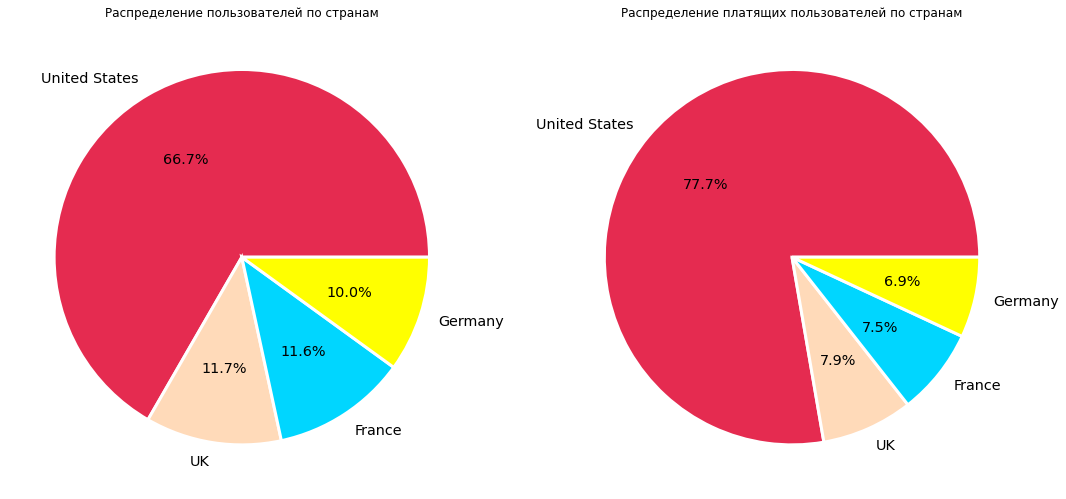

In [32]:
# построение круговых диаграмм по странам
plt.figure(figsize=(15, 10))
profiles_region.plot(kind='pie',
               y="total_users",
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00'],
               label='', # подпись 
               legend = False,      
               title = f"Распределение пользователей по странам", ax = plt.subplot(1,2,1))

profiles_region.plot(kind='pie',
               y="payers",      
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00'],
               label='', # подпись 
               legend = False,
               title = f"Распределение платящих пользователей по странам", ax = plt.subplot(1,2,2),
               )
    

plt.tight_layout()
plt.show()

In [33]:
# создание столбца неплатящих пользователей
profiles_region['not_payer'] = profiles_region['total_users'] - profiles_region['payers']
profiles_region = profiles_region[[
                 'total_users',
                 'payers',
                 'not_payer',
                 'payers_share']]
profiles_region

total_users  payers  not_payer  payers_share
region                                                     
United States       100002    6902      93100          6.90
UK                   17575     700      16875          3.98
France               17450     663      16787          3.80
Germany              14981     616      14365          4.11

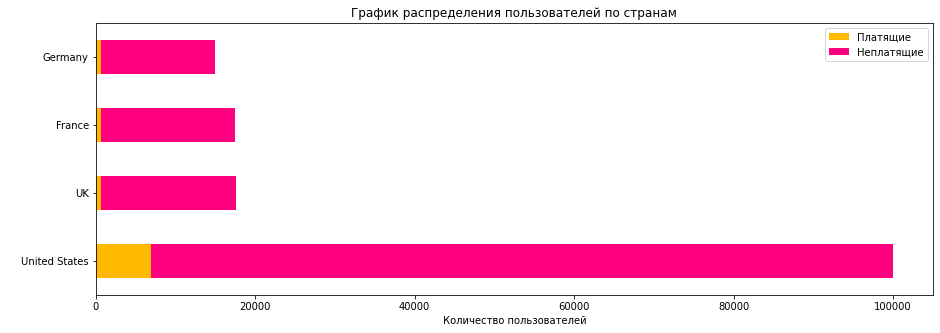

In [34]:
# создание графика распределения пользователей по странам
fig, ax = plt.subplots(figsize=(15, 5))
profiles_region[['payers', 'not_payer']]\
               .plot(kind='barh', stacked=True, ax=ax, color={'#ff0080','#ffba00'})
ax.legend(['Платящие', 'Неплатящие'])
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('График распределения пользователей по странам')
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Мы видим, что наибольшей популярностью приложение пользуется у пользователей из США(66.7%), во Франции и Великобритании доля пользователей приблизительно равна, замыкают цепочку - пользователи из Германии(6.9%).<br>
    Основная доля пользователей, которые совершают покупки в приложении, приходится на пользователей из США - 77.7%, показатели Франции и Великобритании снова схожи. Меньше всего - из Германии(6.94%). Это логично, так как число пользователей из США значительно превосходит другие страны.<br>
    Если изучить соотношение платящих и неплатящих пользователей в каждой стране, то отметим следующее. США снова лидер, здесь около 6.9% всех пользователей совершают покупки. На втором месте - Германия - 4.11%. Это хороший показатель, учитывая, что по общему числу пользователей Германия на последнем месте. Великобритания и Франция замыкают цепочку - 3.98% и 3.8% соответственно.<br>
</div>

#### Распределение пользователей по устройствам

In [35]:
# создание таблицы пользователей в разрезе устройств и количества пользователей
profiles_device = (
                   profiles.groupby('device')\
                  .agg({'user_id':'nunique'})\
                  .sort_values(by='user_id', ascending=False)\
                  )

profiles_device.columns = ['total_users']

# создание таблицы в разрезе устройств и платящих пользователей
profiles_device_payer = (
                  profiles.query('payer==True')\
                 .groupby('device')\
                 .agg({'user_id':'nunique'})\
                 .sort_values(by='user_id', ascending=False) 
                 )

profiles_device_payer.columns = ['payers']

# объединение таблиц
profiles_device = profiles_device.join(profiles_device_payer, on='device')

profiles_device

total_users  payers
device                      
iPhone         54479    3382
Android        35032    2050
PC             30455    1537
Mac            30042    1912

In [36]:
# создание столбца неплатящих пользователей
profiles_device['not_payer'] = profiles_device['total_users'] - profiles_device['payers']

# расчет доли платящих от количества пользователей устройства 
profiles_device['payers_share'] = round((profiles_device['payers']\
                         .div(profiles_device['total_users'], axis=0))*100,2)
profiles_device

total_users  payers  not_payer  payers_share
device                                               
iPhone         54479    3382      51097          6.21
Android        35032    2050      32982          5.85
PC             30455    1537      28918          5.05
Mac            30042    1912      28130          6.36

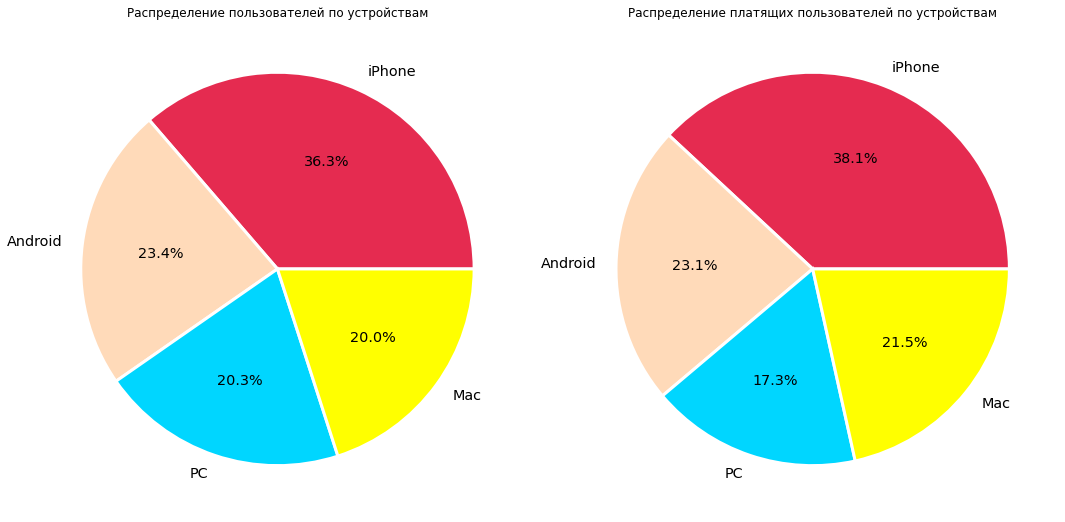

In [37]:
# построение круговых диаграмм по устройствам
plt.figure(figsize=(15, 10))
profiles_device.plot(kind='pie',
               y="total_users",
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00'],
               label='', # подпись 
               legend = False,      
               title = f"Распределение пользователей по устройствам", 
                     ax = plt.subplot(1,2,1))

profiles_device.plot(kind='pie',
               y="payers",      
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00'],
               label='', # подпись 
               legend = False,
               title = f"Распределение платящих пользователей по устройствам", 
                     ax = plt.subplot(1,2,2),
               )
    

plt.tight_layout()
plt.show()

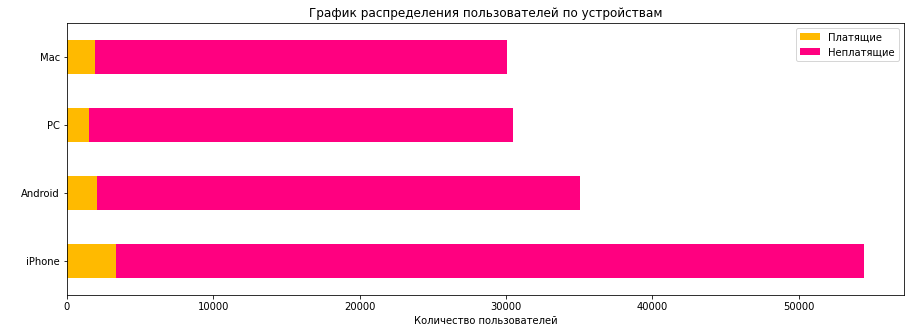

In [38]:
# создание графика распределения пользователей по устройствам
fig, ax = plt.subplots(figsize=(15, 5))
profiles_device[['payers', 'not_payer']]\
               .plot(kind='barh', stacked=True, ax=ax, color={'#ff0080','#ffba00'})
ax.legend(['Платящие', 'Неплатящие'])
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('График распределения пользователей по устройствам')
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Мы видим, что наибольшей популярностью приложение пользуется у обладателей iPhone (36.3%), следом идут пользователи устройств на платформе Android(23.4%), с ПК и Макбуков заходят реже всего - 20.3% и 20% соответственно. В целом пользователи распределены более менее равномерно в разрезе устройств.</li>
<li>Основная доля пользователей, которые совершают покупки в приложении, приходится на использующих iPhone - 38.1%, следом идут пользователи Android(23.1%), а вот на ПК - всего 17.3%.</li>
<li>Если изучить соотношение платящих и неплатящих пользователей по усройствам, то отметим следующее. Mac - лидер, здесь около 6.36% всех пользователей совершают покупки. На втором месте - iPhone - 6.21%. Реже всего покупки совершают пользователи ПК - 5.05%.</li>
<li>Сделаем вывод, что пользователи чаще всего заходят в приложение и совершают покупки, используя устройства на iOS.</li>
</div>

#### Распределение пользователей по рекламным источникам привлечения

In [39]:
# создание таблицы пользователей в разрезе каналов привлечения
profiles_channel = (
                   profiles.groupby('channel')\
                  .agg({'user_id':'nunique'})\
                  .sort_values(by='user_id', ascending=False)\
                  )

profiles_channel.columns = ['total_users']

# создание таблицы в разрезе канала и платящих пользователей
profiles_channel_payer = (
                  profiles.query('payer==True')\
                 .groupby('channel')\
                 .agg({'user_id':'nunique'})\
                 .sort_values(by='user_id', ascending=False) 
                 )

profiles_channel_payer.columns = ['payers']

# объединение таблиц
profiles_channel = profiles_channel.join(profiles_channel_payer, on='channel')

profiles_channel

total_users  payers
channel                                
organic                   56439    1160
FaceBoom                  29144    3557
TipTop                    19561    1878
OppleCreativeMedia         8605     233
LeapBob                    8553     262
WahooNetBanner             8553     453
RocketSuperAds             4448     352
MediaTornado               4364     156
YRabbit                    4312     165
AdNonSense                 3880     440
lambdaMediaAds             2149     225

In [40]:
# создание столбца неплатящих пользователей
profiles_channel['not_payer'] = profiles_channel['total_users'] - profiles_channel['payers']

# расчет доли платящих 
profiles_channel['payers_share'] = round((profiles_channel['payers']\
                         .div(profiles_channel['total_users'], axis=0))*100,2)


profiles_channel

total_users  payers  not_payer  payers_share
channel                                                         
organic                   56439    1160      55279          2.06
FaceBoom                  29144    3557      25587         12.20
TipTop                    19561    1878      17683          9.60
OppleCreativeMedia         8605     233       8372          2.71
LeapBob                    8553     262       8291          3.06
WahooNetBanner             8553     453       8100          5.30
RocketSuperAds             4448     352       4096          7.91
MediaTornado               4364     156       4208          3.57
YRabbit                    4312     165       4147          3.83
AdNonSense                 3880     440       3440         11.34
lambdaMediaAds             2149     225       1924         10.47

In [41]:
# добавление строки "другие" в топ-6 каналов
profiles_channel_top = profiles_channel[:6]
profiles_channel_top = profiles_channel_top.\
                    reindex([*profiles_channel_top.index, "other"])

profiles_channel_top.at['other','total_users'] = \
                   profiles_channel[6:]['total_users'].sum()
profiles_channel_top = profiles_channel_top[['total_users']]
profiles_channel_top

total_users
channel                        
organic                 56439.0
FaceBoom                29144.0
TipTop                  19561.0
OppleCreativeMedia       8605.0
LeapBob                  8553.0
WahooNetBanner           8553.0
other                   19153.0

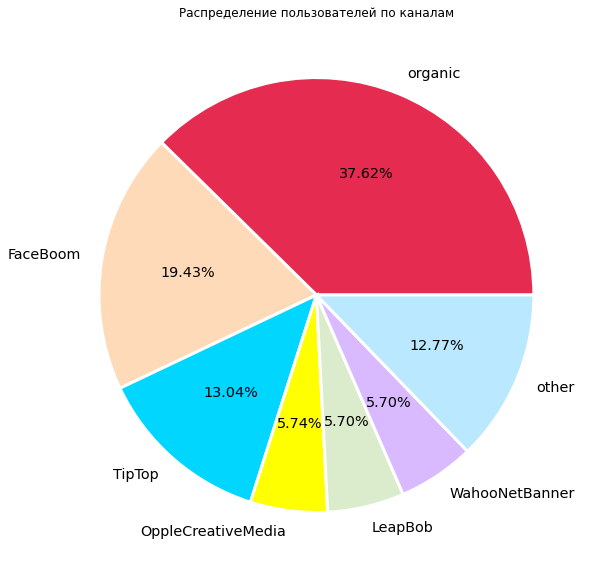

In [42]:
# круговая диаграмма
profiles_channel_top.plot(kind='pie',
               y="total_users",      
               autopct='%.2f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', 
                         '#ffff00', '#dbeccc', '#d9b9ff', 
                         '#b9e8ff'],
               label='', # подпись 
               legend = False,
               figsize=(10,10),
               title = f"Распределение пользователей по каналам",
               )

plt.show()

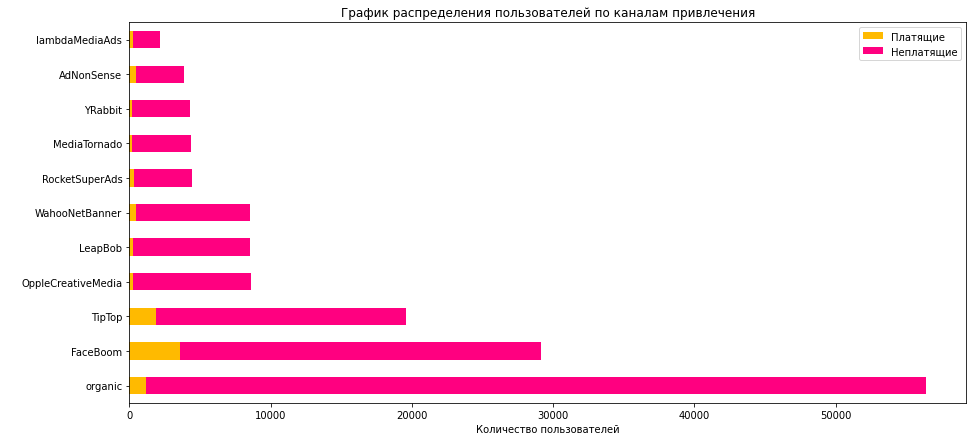

In [43]:
# создание графика распределения пользователей по каналам привлечения
fig, ax = plt.subplots(figsize=(15, 7))
profiles_channel[['payers', 'not_payer']]\
               .plot(kind='barh', stacked=True, ax=ax, color={'#ff0080','#ffba00'})
ax.legend(['Платящие', 'Неплатящие'])
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('График распределения пользователей по каналам привлечения')
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Мы видим, что больше всего приложением пользуются органические пользователи - 37.62%. То есть пользователи, которые самостоятельно перешли на сайт, выбрав его в поисковой выдаче. Из канала FaceBoom приходит около 19.4% всех пользователей. На каналы OppleCreativeMedia, LeapBob, WahooNetBanner приходится приблизительно по 5.6% всех пользователей.<br>
    Если рассмотреть конверсию в разрезе каналов, то органические пользователи показывают низкие результаты. Всего 2% пользователей совершают покупки в приложении. Хорошие результаты показывают пользователи, которые пришли из FaceBoom(12.2%), AdNonSense(11.3%), lambdaMediaAds(10.5%) и TipTop(9.6%). Эти каналы приводят самую высокую долю платящих пользователей.<br>
</div>

*Рассмотрим, как распределяются каналы привлечения пользователей по странам.*

In [44]:
# создание столбца с категориями региона
def region_categor(region):
    try:
        if region in ('UK', 'Germany', 'France'):
            return 'Europe'
        else:
            return 'USA'
    except:
        return 'ошибка!!!'
    
    
profiles['local'] = profiles['region'].apply(region_categor)

In [45]:
# создание таблицы каналов привлечения для США
usa_channel = profiles.query('local=="USA" and channel!="organic"')\
             .groupby('channel')\
             .agg({'user_id':'nunique'})\
             .sort_values(by='user_id', ascending=False)
usa_channel.columns = ['total_users']

# объединение таблиц
usa_channel = usa_channel.join(profiles_channel_payer, on='channel')

# расчет доли платящих 
usa_channel['payers_share'] = round((usa_channel['payers']\
                         .div(usa_channel['total_users'], axis=0))*100,2)

usa_channel

total_users  payers  payers_share
channel                                          
FaceBoom              29144    3557         12.20
TipTop                19561    1878          9.60
RocketSuperAds         4448     352          7.91
MediaTornado           4364     156          3.57
YRabbit                4312     165          3.83

In [46]:
# создание таблицы каналов привлечения для стран Европы
eu_channel = profiles.query('local=="Europe" and channel!="organic"')\
            .groupby('channel')\
            .agg({'user_id':'nunique'})\
            .sort_values(by='user_id', ascending=False)
eu_channel.columns = ['total_users']

# объединение таблиц
eu_channel = eu_channel.join(profiles_channel_payer, on='channel')

# расчет доли платящих 
eu_channel['payers_share'] = round((eu_channel['payers']\
                         .div(eu_channel['total_users'], axis=0))*100,2)

eu_channel

total_users  payers  payers_share
channel                                              
OppleCreativeMedia         8605     233          2.71
LeapBob                    8553     262          3.06
WahooNetBanner             8553     453          5.30
AdNonSense                 3880     440         11.34
lambdaMediaAds             2149     225         10.47

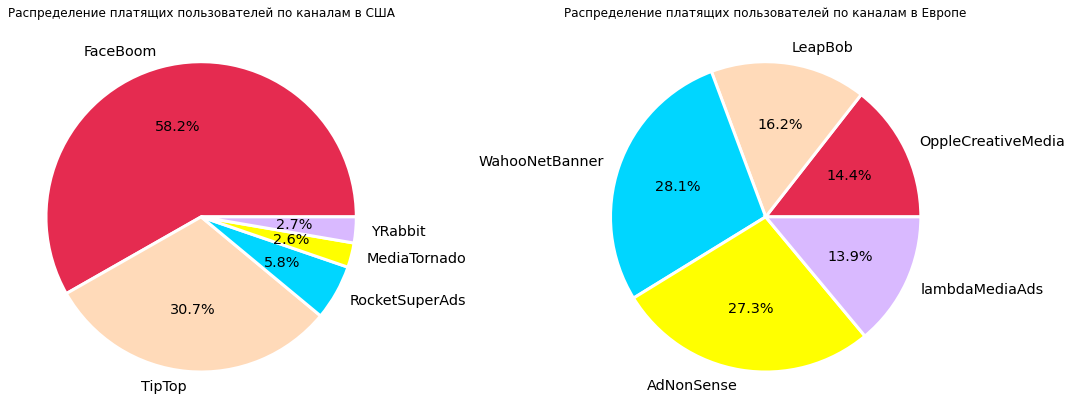

In [47]:
# построение круговых диаграмм по каналам для стран
plt.figure(figsize=(15, 15))
usa_channel.plot(kind='pie',
               y="payers",
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00', '#d9b9ff'],
               label='', # подпись 
               legend = False,      
               title = f"Распределение платящих пользователей по каналам в США", 
               ax = plt.subplot(1,2,1))

eu_channel.plot(kind='pie',
               y="payers",      
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00', '#d9b9ff'],
               label='', # подпись 
               legend = False,
               title = f"Распределение платящих пользователей по каналам в Европе", 
               ax = plt.subplot(1,2,2),
               )
    

plt.tight_layout()
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Четко видно, как каналы делятся по регионам. 5 источников для США и 5 - для европейских стран.<br>
    На американском рынке больше всего покупателей привлекли такие каналы, как FaceBoom и TipTop - на них пришлось 58% и 31% всех покупателей соответственно.<br>
    В странах Европы картина немного отличается. Здесь нет очевидных лидеров. Каналы привлечения разделились равномерно. Больше всего покупателей привлекла сеть WahooNetBanner.<br> 
</div>

#### Вывод после исследовательского анализа: 

<div style="border:solid pink 5px; padding: 20px">
<li>Мы посмотрели на пользователей в разрезе стран, устройств и каналов привлечения. А также изучили их конверсию в платящих.</li>
<li>Подавляющее количество пользователей из США, меньше всего - из Германии. В США пользователи лучше всего конвертируются в платящих, в Германии также пользователи часто совершают покупки.</li>    
<li>Чаще всего в приложение заходят с iPhon или Android, то есть с мобильных устройств. </li>    
<li>Стоит отметить, что пользователи, использующие Mac и iPhone, чаще остальных конвертируются в платящих.</li>
<li>Большое количество пользователей приходят органически, но также они имеют низкую конверсию в покупателей.</li> 
<li>Два самых больших канала - TipTop и FaceBoom показывают хорошие результаты конверсии пользователей в покупателей. AdNonSense и lambdaMediaAds, несмотря на небольшой объем привлеченных пользователей, показывают высокую конверсию - 11.34% и 10.47% соответственно.</li>     
<li>Платформы привлечения клиентов разделились на американский и европейский рынок. В США FaceBoom и TipTop чаще всего приводит новых покупателей, а в Европе платформы разделились равномерно, но WahooNetBanner немного опередила остальные каналы.</li> 
</div> 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [48]:
# подсчет общей суммы расходов на маркетинг
costs_total = round(costs['costs'].sum(),2)

print(f'Общая сумма расходов на маркетинг составляет {costs_total}')

Общая сумма расходов на маркетинг составляет 105497.3


In [49]:
# создание таблицы распределения расходов по каналам привлечения
costs_channel = (costs.groupby('channel')\
                .agg({'costs':'sum'})
                .sort_values(by='costs', ascending=False) 
                )
# расчет доли  
costs_channel['costs_share'] = round((costs_channel['costs']\
                         .div(costs_channel['costs'].sum(), axis=0))*100,2)

costs_channel

costs  costs_share
channel                                  
TipTop              54751.30        51.90
FaceBoom            32445.60        30.75
WahooNetBanner       5151.00         4.88
AdNonSense           3911.25         3.71
OppleCreativeMedia   2151.25         2.04
RocketSuperAds       1833.00         1.74
LeapBob              1797.60         1.70
lambdaMediaAds       1557.60         1.48
MediaTornado          954.48         0.90
YRabbit               944.22         0.90

In [50]:
# создание таблицы по распределению расходов, топ 5-каналов
costs_channel_top = costs_channel[:5]
costs_channel_top = costs_channel_top.\
                    reindex([*costs_channel_top.index, "other"])

costs_channel_top.at['other','costs'] = \
                   costs_channel[5:]['costs'].sum()
costs_channel_top = costs_channel_top[['costs']]
costs_channel_top

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
other                7086.90

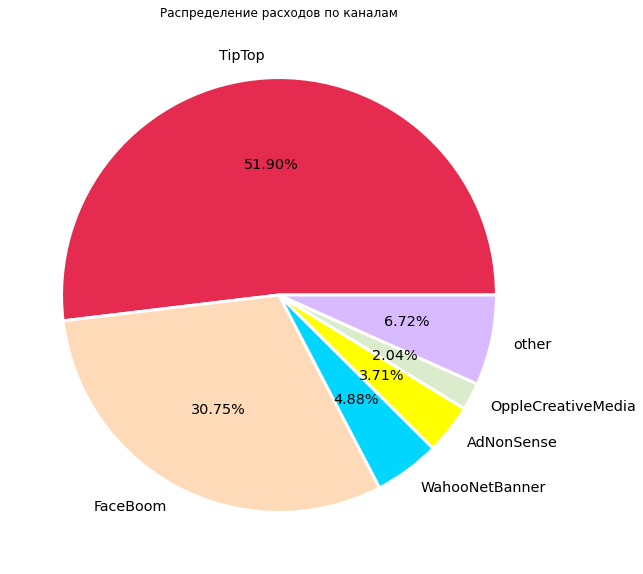

In [51]:
# круговая диаграмма
costs_channel_top.plot(kind='pie',
               y="costs",      
               autopct='%.2f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', 
                         '#ffff00', '#dbeccc', '#d9b9ff', 
                         ],
               label='', # подпись 
               legend = False,
               figsize=(10,10),
               title = f"Распределение расходов по каналам",
               )

plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Мы видим, что основной объем трат приходится на две платфоормы - TipTop и FaceBoom. При этом эти же каналы дают хорошие показатели привлечения и конверсии, как показал исследовательский анализ, конверсия оказалась 9.6% и 12.2% соответственно.<br>  
При значительных тратах на канал WahooNetBanner он показывает не самую высокую конверсию - 5.3%, хотя канал вошел в топ-5 каналов по числу привлеченных пользователей.<br>  
AdNonSense показал очень высокую конверсию - 11.34%, но из этого канала пользователи идут неохотно, этот канал на предпоследнем месте по количеству привлеченных пользователей.<br>
</div>

In [52]:
# добавление столбцов с неделей и месяцем
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).astype('datetime64[M]')
costs.head(7)

dt   channel  costs  week      month
0  2019-05-01  FaceBoom  113.3    18 2019-05-01
1  2019-05-02  FaceBoom   78.1    18 2019-05-01
2  2019-05-03  FaceBoom   85.8    18 2019-05-01
3  2019-05-04  FaceBoom  136.4    18 2019-05-01
4  2019-05-05  FaceBoom  122.1    18 2019-05-01
5  2019-05-06  FaceBoom  118.8    19 2019-05-01
6  2019-05-07  FaceBoom  101.2    19 2019-05-01

In [53]:
# создание таблиц для графиков
costs_ch_big = costs.query('channel in ("TipTop","FaceBoom")')
costs_ch = costs.query('channel not in ("TipTop","FaceBoom")')

In [54]:
# создание функции для построения графиков
def cost_channel(data, col, ax):
    pivot = data
    title = {'month': ['ежемесячных', 'месяц', 'месяц'],
              'week': ['еженедельных', 'неделю', 'неделя']}    
    plot = pivot.pivot_table(
           index=col,
           values='costs',
           aggfunc='sum',
           columns='channel'
           ).plot(ax=axes[ax], grid=True, 
                  title=(f'График {title[col][0]} затрат по каналам'),
                  ylabel=(f'затраты на привлечение в {title[col][1]}'),
                  xlabel=(title[col][2]))
    
    plt.tight_layout()

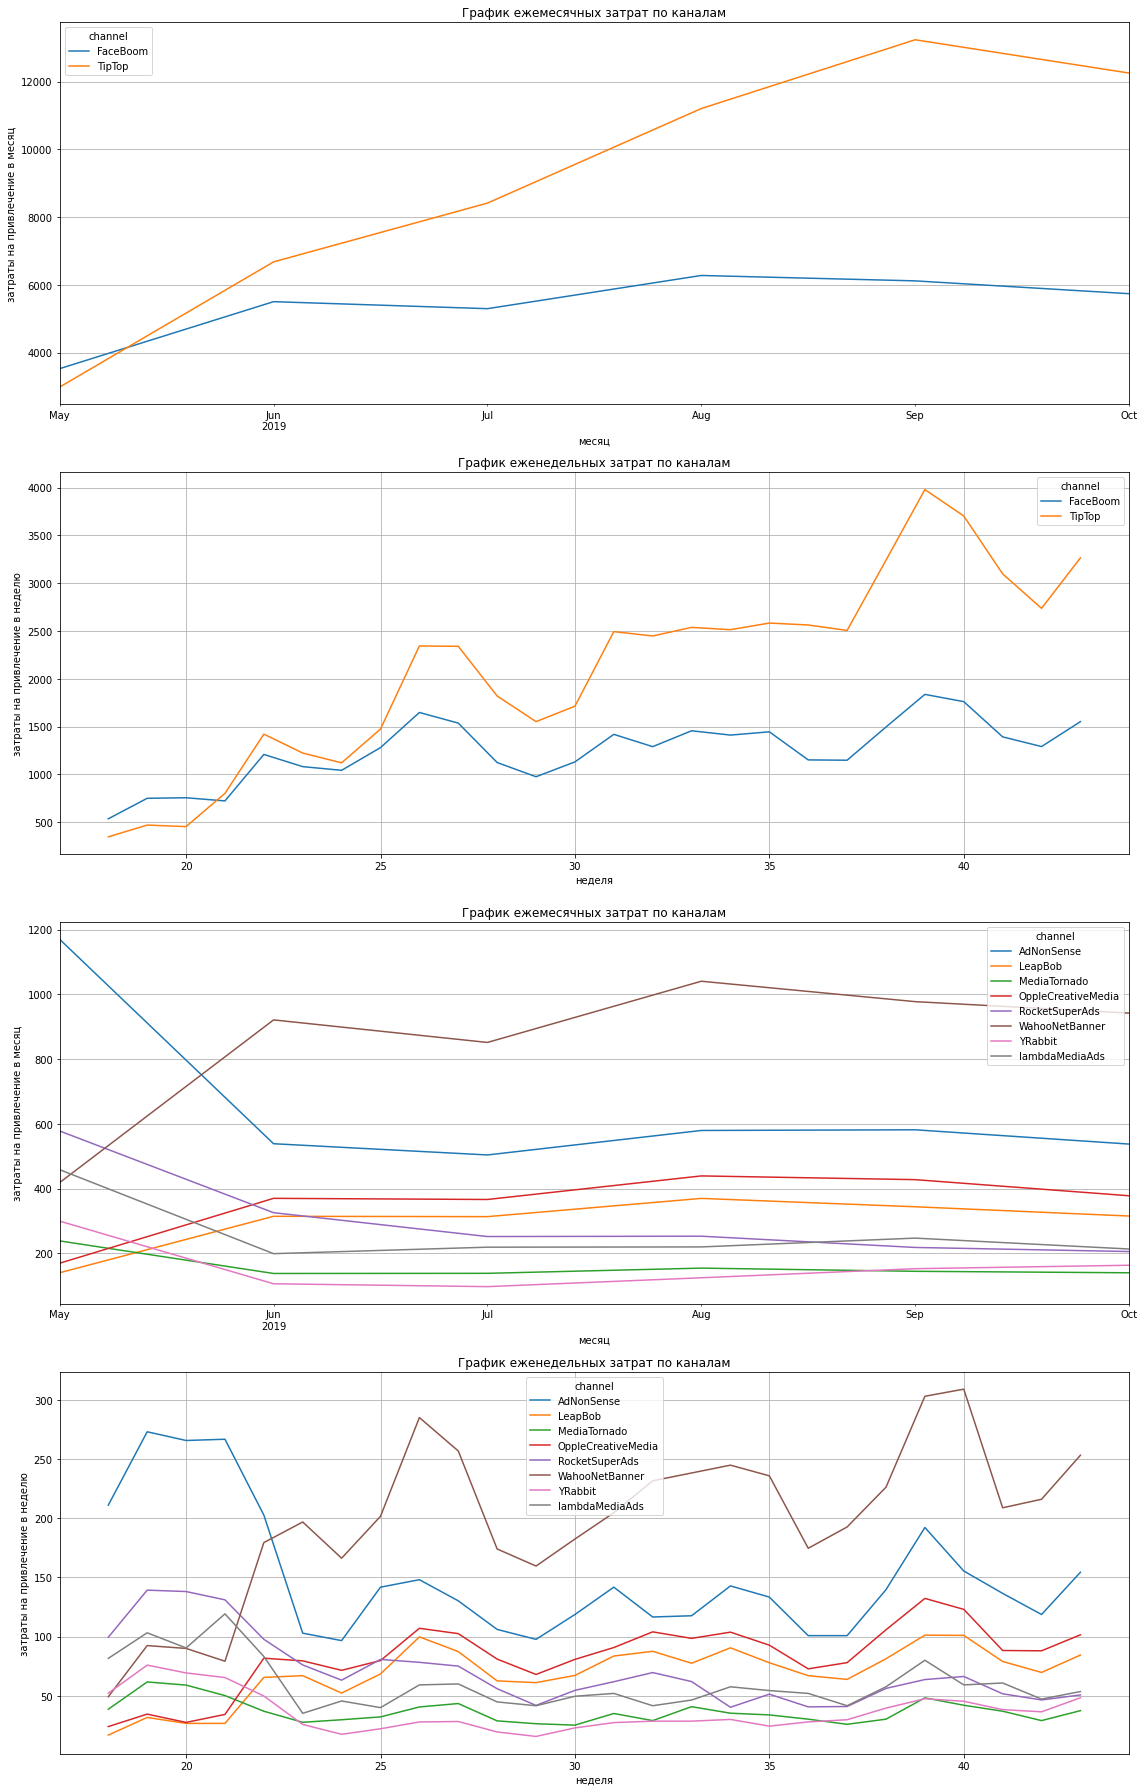

In [55]:
# построение графиков динамики изменения расходов по неделям и месяцам по каналам
fig, axes = plt.subplots(4, 1, figsize=(16,25))


cost_channel(costs_ch_big, 'month', 0)
cost_channel(costs_ch_big, 'week', 1)
cost_channel(costs_ch, 'month', 2)
cost_channel(costs_ch, 'week', 3)

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
На графиках видим подтверждение данных таблиц. Основная статья расходов рекламного бюджета приходится на TipTop и FaceBoom.<br>
    В разрезе еженедельного финансирования линии этих каналов имеют одинаковые тенденции и динамику. Также видно на графике, что с июня месяца был увеличен рекламный бюджет для финансирования этих каналов. Для TipTop расходы росли вплоть до сентября.<br>
    Вместе с тем, в июне было резко сокращено финансирование таких каналов, как AdNonSense, RocketSuperAds, lambdaMediaAds, MediaTornado, YRabbit. И если вложения в канал AdNonSense затем немного выросли в августе, то в расходы на другие источники продолжали сокращаться.<br>
    А в каналы WahooNetBanner, OppleCreativeMedia, LeapBob в июне стали вкладывать больше средств рекламного бюджета.<br>
</div>

In [56]:
# расчет средней стоимости привлечения одного пользователя из каждого канала
cac_channel = profiles.groupby('channel')\
               .agg({'acquisition_cost':'mean'})\
               .sort_values(by='acquisition_cost', ascending=False) 
                
cac_channel

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [57]:
# расчет средней стоимости привлечения в целом по всем каналам
cac_profiles = round(profiles.query('channel!="organic"')\
                     .agg({'acquisition_cost':'mean'}),4)[0]
print(f'Средняя стоимость привлечения одного пользователя в целом составила {cac_profiles}')

Средняя стоимость привлечения одного пользователя в целом составила 1.1275


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
При расчете средней стоимости 1 пользователя "органические" пользователи не были учтены.<br>  
Средняя стоимость привлечения одного пользователя в целом составила 1.13<br>  
Дороже всего компании обходится привлечение 1 пользователя из TipTop, его цена выше среднего и составила 2.80, при этом половина бюджета идет на этот источник.<br>
Остальные каналы "продают" клиентов по цене ниже среднего.<br> 
Канал FaceBoom показывал хорошие показатели конверсии, при этом цена 1 клиента оказалась весьма адеватной - 1.11.<br>
</div>

In [58]:
# расчет средней стоимости привлечения одного пользователя из США
cac_channel_usa = profiles.query('channel in @usa_channel.index').groupby('channel')\
               .agg({'acquisition_cost':'mean'})\
               .sort_values(by='acquisition_cost', ascending=False) 
                
cac_channel_usa

acquisition_cost
channel                         
TipTop                  2.799003
FaceBoom                1.113286
RocketSuperAds          0.412095
YRabbit                 0.218975
MediaTornado            0.218717

In [59]:
# расчет средней стоимости привлечения одного пользователя из Европы
cac_channel_eu = profiles.query('channel in @eu_channel.index').groupby('channel')\
               .agg({'acquisition_cost':'mean'})\
               .sort_values(by='acquisition_cost', ascending=False) 
                
cac_channel_eu

acquisition_cost
channel                             
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
OppleCreativeMedia          0.250000
LeapBob                     0.210172

In [60]:
# расчет средней стоимости привлечения в целом по всем каналам США
cac_profiles_usa = round(profiles.query('channel in @usa_channel.index')\
                     .agg({'acquisition_cost':'mean'}),4)[0]
print(f'Средняя стоимость привлечения одного пользователя в США {cac_profiles_usa}')

Средняя стоимость привлечения одного пользователя в США 1.4706


In [61]:
# расчет средней стоимости привлечения в целом по всем каналам Европы
cac_profiles_eu = round(profiles.query('channel in @eu_channel.index')\
                     .agg({'acquisition_cost':'mean'}),4)[0]
print(f'Средняя стоимость привлечения одного пользователя в Европе {cac_profiles_eu}')

Средняя стоимость привлечения одного пользователя в Европе 0.459


#### Вывод после анализа: 

<div style="border:solid pink 5px; padding: 20px">
<li>Общая сумма расходов на маркетинг за полгода составила 105,5 тысяч долларов.</li>
<li>Основная статья расходов приходится на один источник - TipTop, привлечение одного клиента из этого канала обходится компании дороже всего - 2.8 доллара. Следом по размеру финансирования идет FaceBoom, при этом здесь один пользователь стоит ниже среднего по всем каналам - 1.11 доллара, что на 60п.п. ниже, чем стоимость одного клиента из канала TipTop.</li>    
<li>Имеет место сезонность финансирования каналов привлечения клиентов. Летом расходы на рекламу растут.</li> 
<li>Средняя стоимость привлечения одного пользователя в целом по всем каналам составила 1.13.</li>
<li>Дороже всего обходится привлечение клиентов из США - 1.47 доллара за одного клиента. В Европе - 0.46 доллара.</li> 
<li>Дешево обходятся клиенты из каналов OppleCreativeMedia, YRabbit, MediaTornado, LeapBob. </li>   <li>Органические клиенты не учитывались при расчете, так как они пришли бесплатно.</li>
</div> 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### LTV и RO

*Проанализируем окупаемость рекламы c помощью графиков LTV и ROI*

*Перед началом анализа окупаемости рекламы стоит исключить органических пользователей. Они приносят доход компании, но на их привлечение компания не тратила денежных средств.*

In [62]:
# исключаем органических пользователей
profiles = profiles.query('channel != "organic"')

# расчет LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    order,
    observation,
    horizon,
)

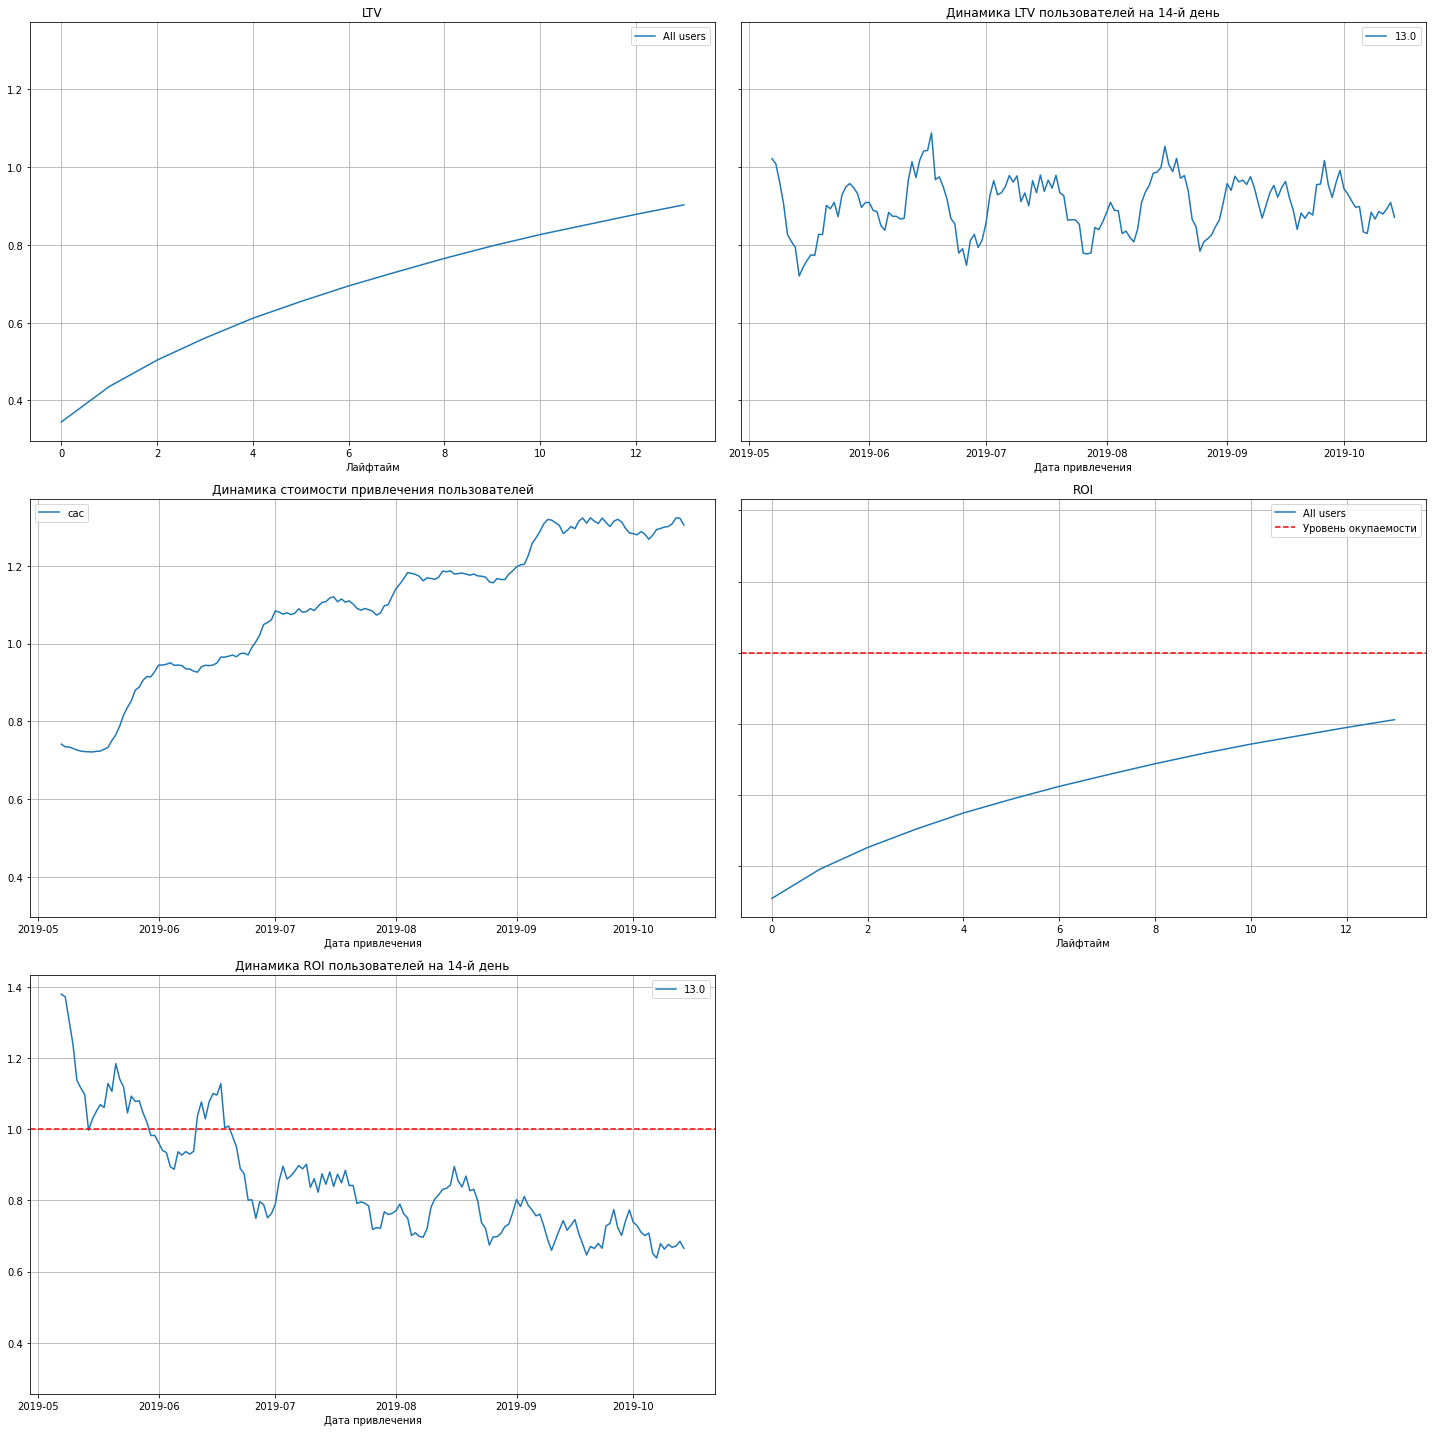

In [63]:
# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon)

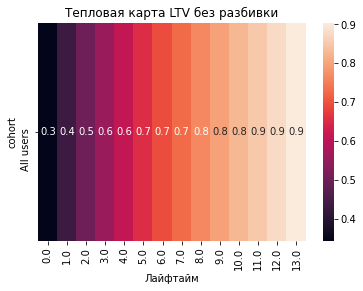

In [64]:
# создание тепловой карты
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.1f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

*Выводы по графикам:*  

- Реклама не окупается, LTV к 14 дню остается на уровне чуть выше 80%;
- Двухнедельный LTV пользователей составил 90 центов.
- LTV подвержен влиянию сезонного фактора, но и этот показатель достаточно стабилен;
- САС растет, то есть каждый новый клиент обходится компании все дороже. Рост идет скачками, рекламный бюджет увеличивается, компания активно занимается привлечением клиентов;
- До июня наблюдаем окупаемость инвестиций в рекламу, но начиная с июня что-то пошло не так. Пользователи перестали окупаться.

#### Окупаемость рекламы с разбивкой по устройствам

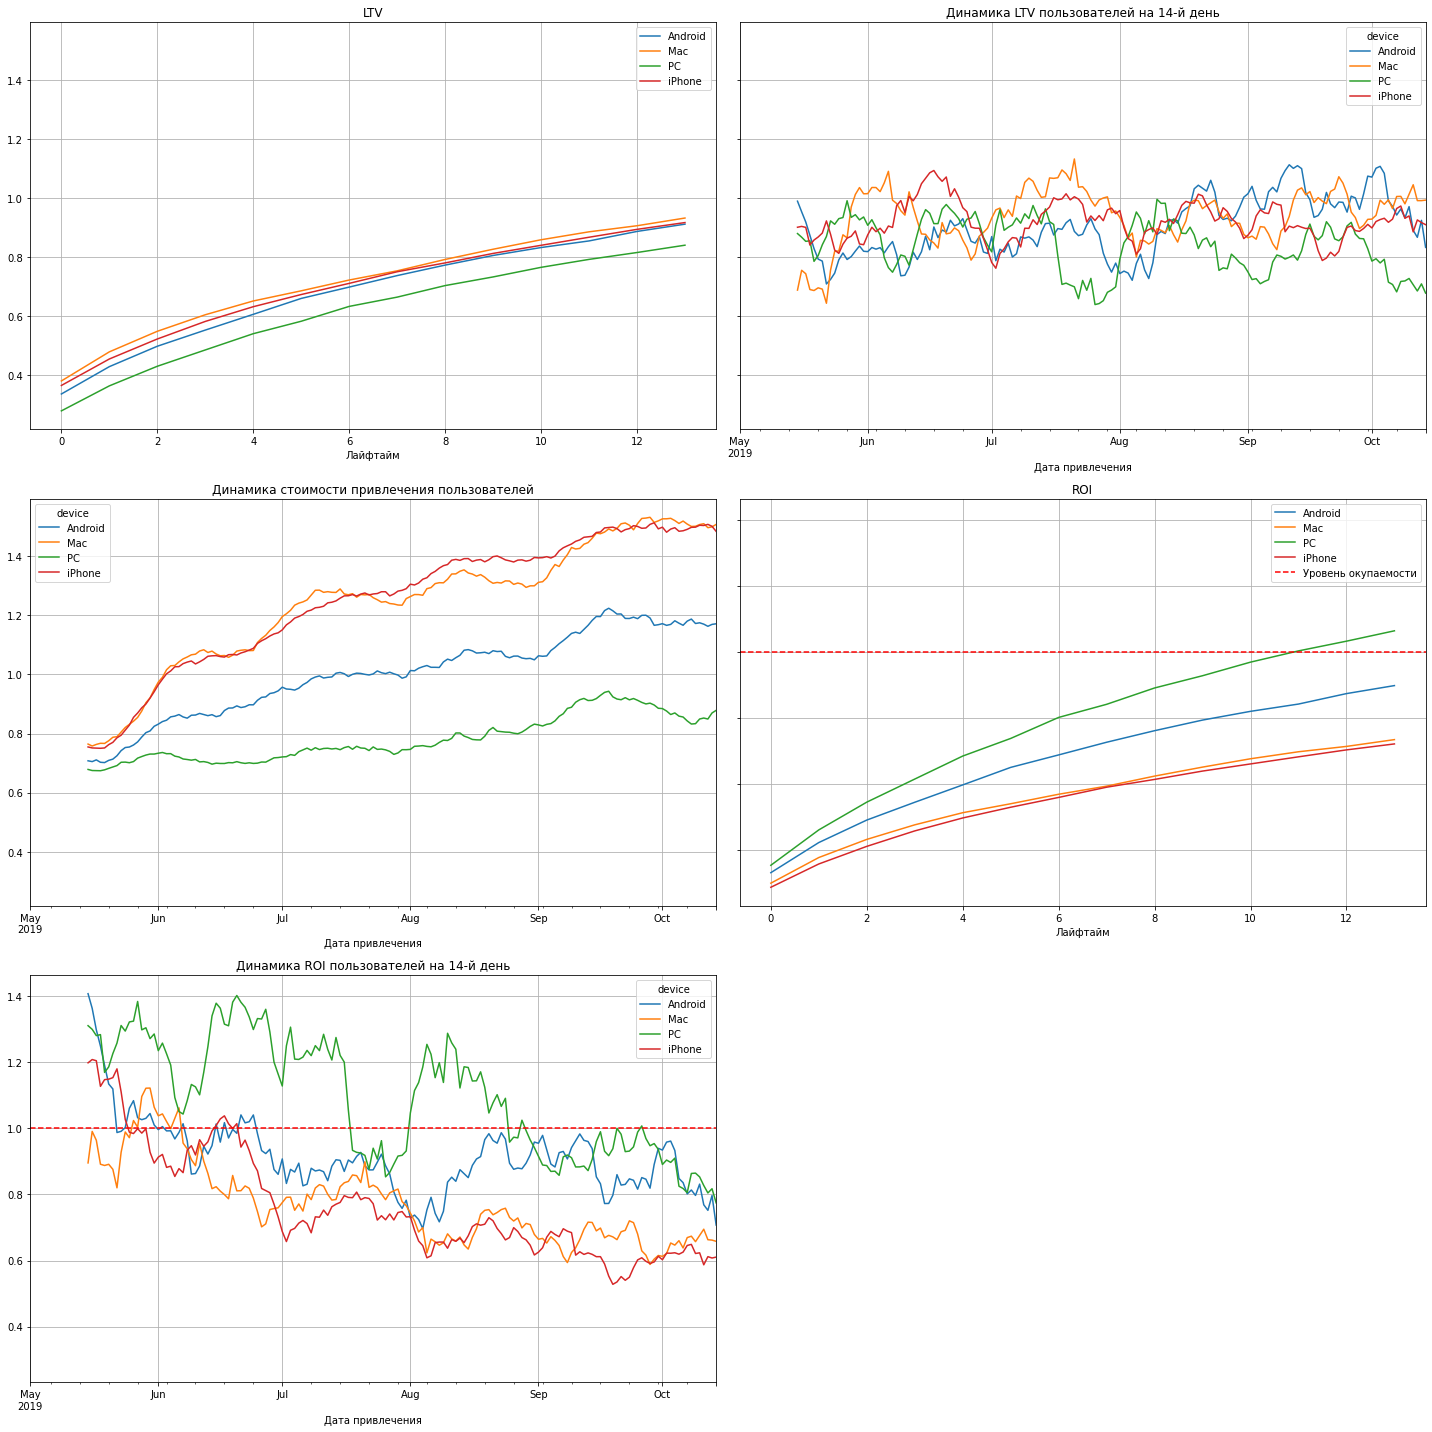

In [65]:
# расчет LTV и ROI с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    order,
    observation,
    horizon,
    dimensions=dimensions
)

# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

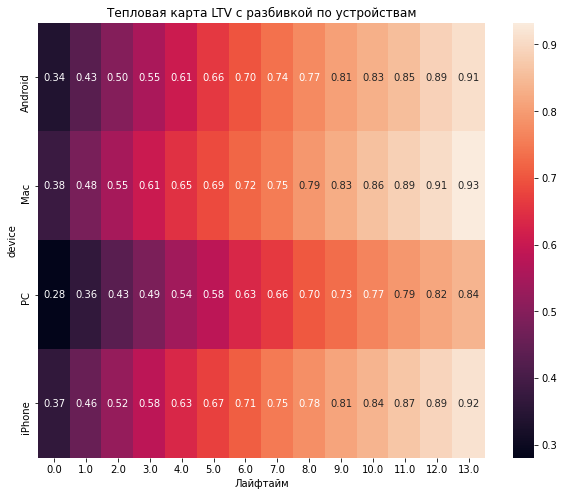

In [66]:
# создание тепловой карты
plt.figure(figsize=(10, 8))

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV с разбивкой по устройствам')
plt.xlabel('Лайфтайм')
plt.show()

*Выводы по графикам:*  

- LTV стабилен по всем устройствам.
- Реклама окупается только по устройству - ПК, на 11 день, по остальным устройствам - нет.
- Самый высокий двухнедельный LTV составил 93 цента и пришелся на Mac, меньше всего дохода приносят пользователи, зашедшие с ПК.
- LTV подвержен влиянию сезонного фактора, но и этот показатель достаточно стабилен;
- САС растет по всем устройствам, то есть каждый новый клиент обходится компании все дороже. Сильнее всего растет цена привлечения пользователей iPhone и Mac. На ПК рост не так ярко выражен.
- До июня наблюдаем окупаемость инвестиций в рекламу, но начиная с июня показатели по всем устройствам падают. Пользователи перестали окупаться, пользователи ПК окупались до сентября, затем по ним также отмечен спад.

#### Окупаемость рекламы с разбивкой по странам

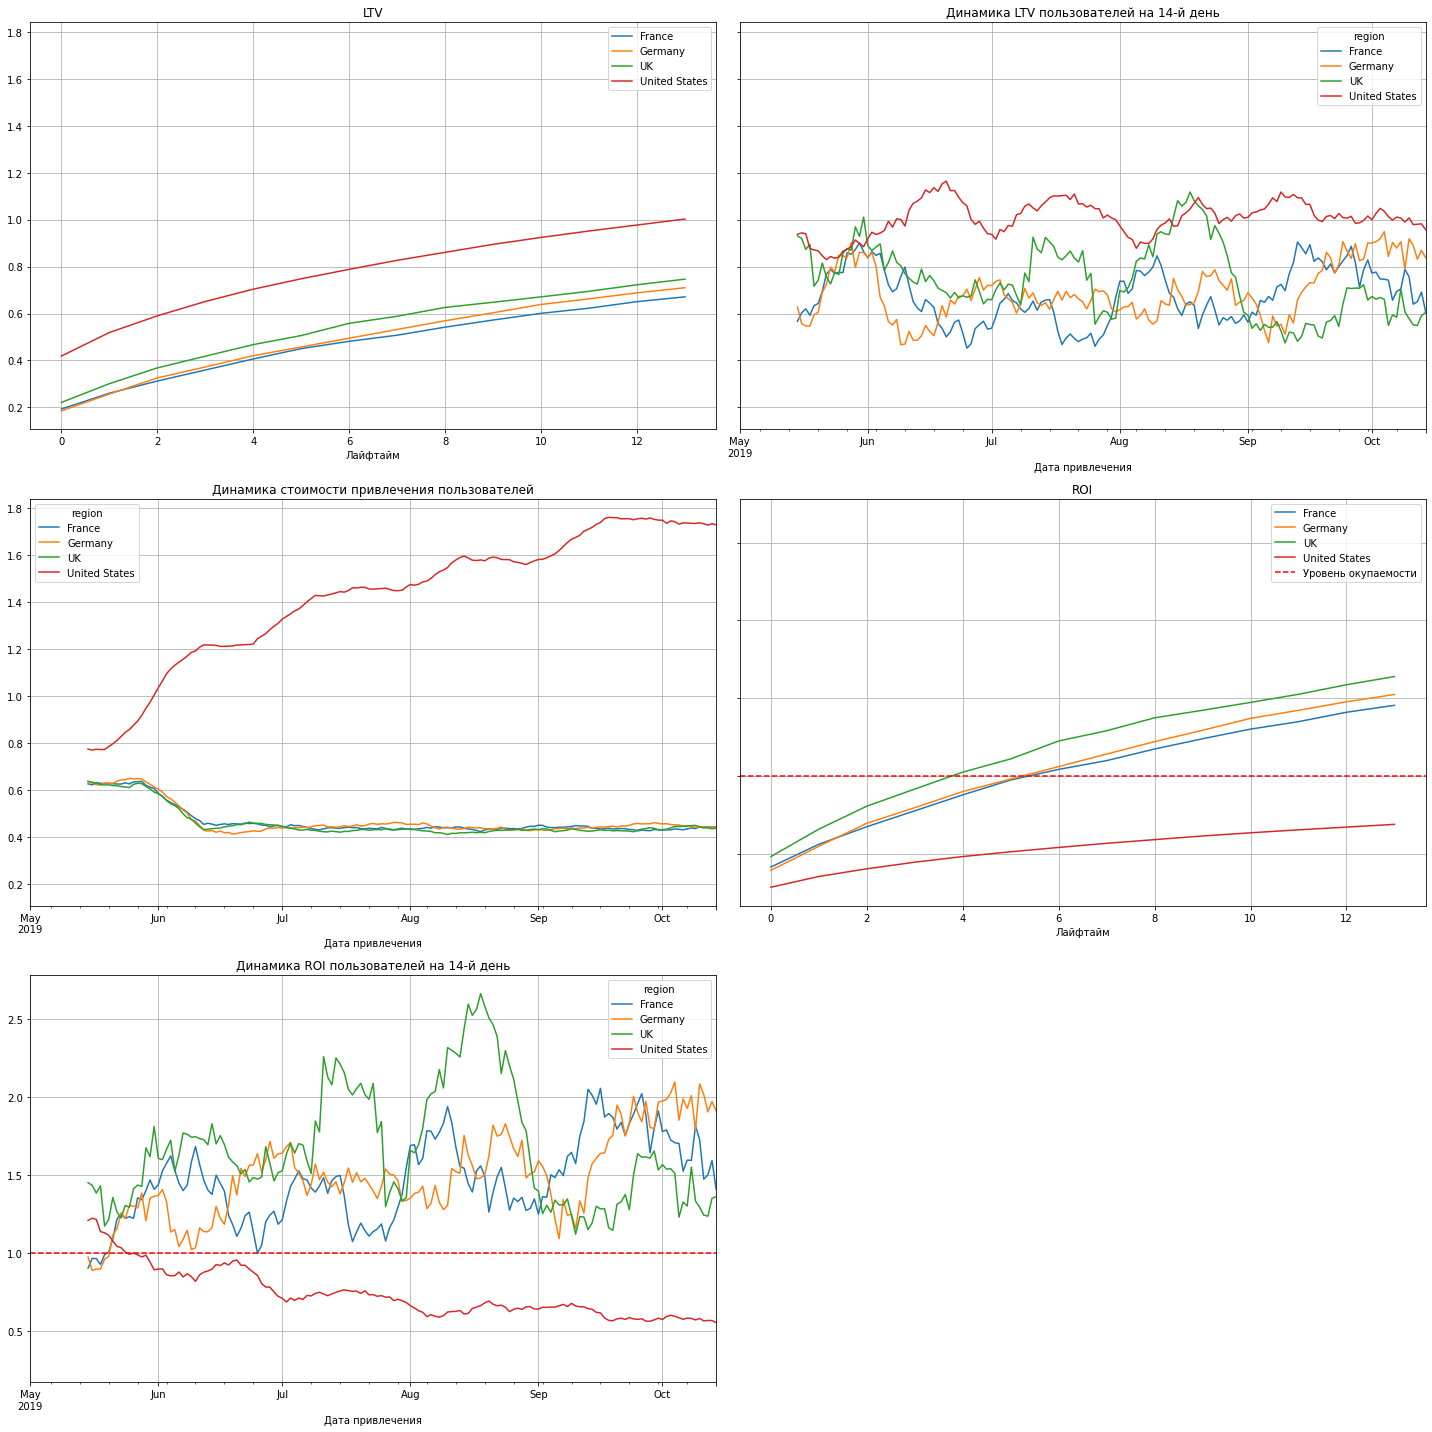

In [67]:
# расчет LTV и ROI с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    order,
    observation,
    horizon,
    dimensions=dimensions
)

# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

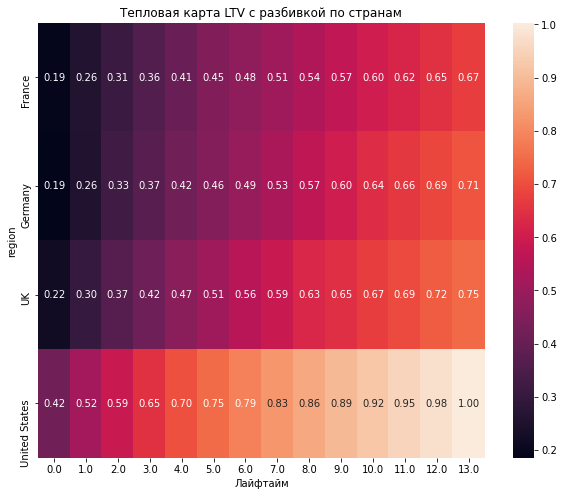

In [68]:
# создание тепловой карты
plt.figure(figsize=(10, 8))

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV с разбивкой по странам')
plt.xlabel('Лайфтайм')
plt.show()

*Выводы по графикам:*  

- LTV стабилен везде
- Самый высокий двухнедельный LTV составил 1 доллар и пришелся на США, меньше всего дохода приносят пользователи из Франции.
- LTV подвержен влиянию сезонного фактора, но и этот показатель достаточно стабилен, в США сезонность выражена слабее всего;
- САС очень резко и быстро растет по пользователям из США, то есть пользователи в США теперь стали обходиться компании дороже. В остальных странах мы видим, что стоимость 1 клиента в июне резко снизилась и сохраняется на одном уровне. 
- Реклама не окупается только по США, причем окупаемость имеет тенденцию к снижению. В странах Европы наблюдаем окупаемость инвестиций в рекламу уже на 6 день.

#### Окупаемость рекламы с разбивкой по рекламным каналам

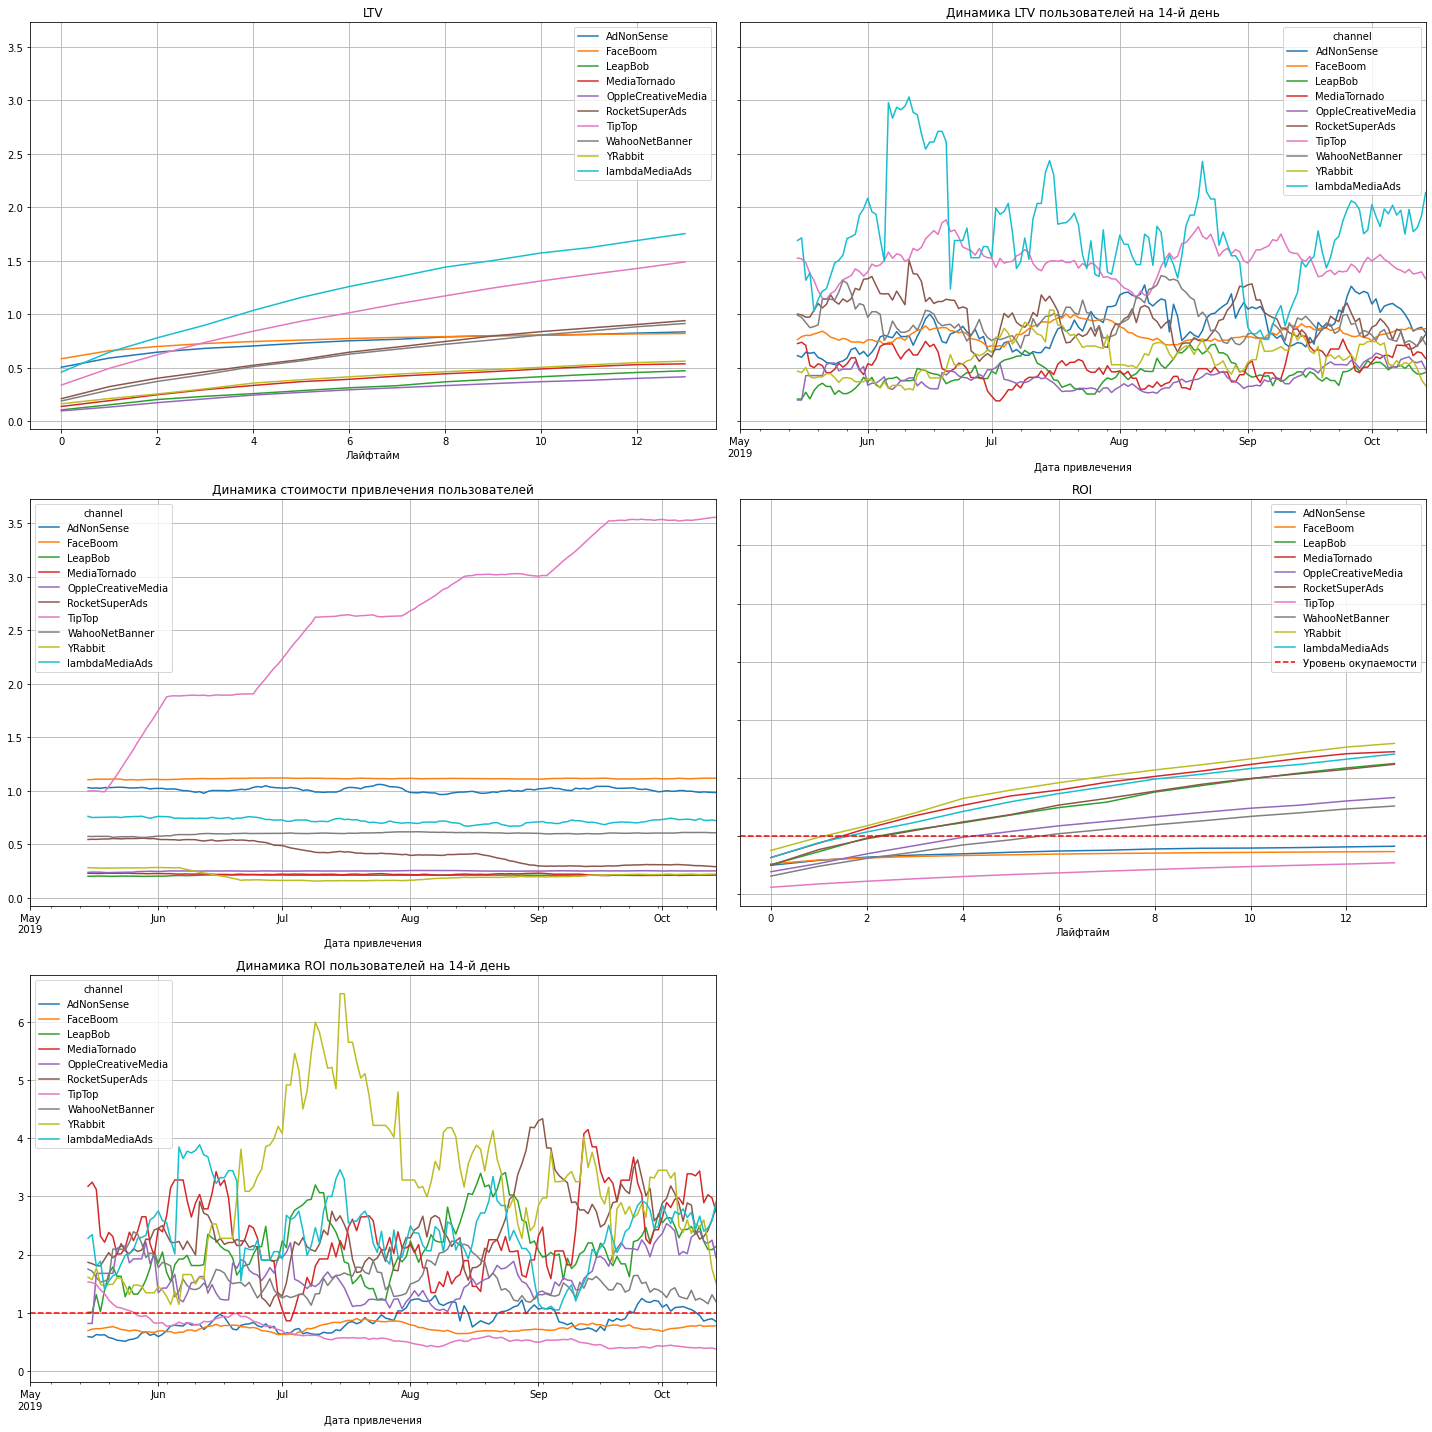

In [69]:
# расчет LTV и ROI с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    order,
    observation,
    horizon,
    dimensions=dimensions
)

# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

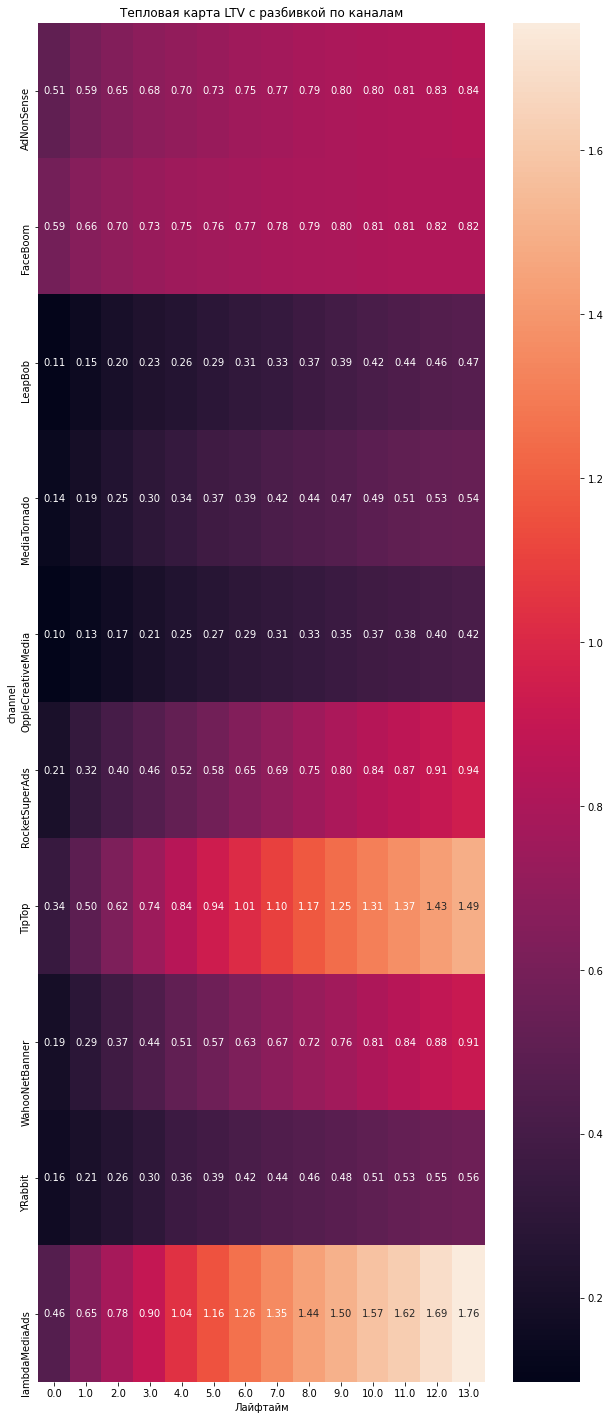

In [70]:
# создание тепловой карты
plt.figure(figsize=(10, 25))

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV с разбивкой по каналам')
plt.xlabel('Лайфтайм')
plt.show()

*Выводы по графикам:*  

- LTV стабилен везде
- Самые высокие двухнедельные LTV составили 1.76 1.49 и пришлись на lambdaMediaAds и TipTop, меньше всего дохода приносят пользователи из OppleCreativeMedia и LeapBob.
- САС очень резко и быстро вырос в июне по пользователям из TipTop, то есть пользователи в TipTop теперь стали обходиться компании значительно дороже. Стоимость пользователей из RocketSuperAds в сентябре снизилась, а по клиентам из других каналов стоимость привлечения держится на одном уровне
- Реклама не окупается только по каналам  TipTop, FaceBoom, AdNonSense. По остальным каналам окупаемость рекламных инвестиций наступает уже к концу первой недели. 

*Посмотрим на окупаемость отдельно по американскому и европейскому рынку*

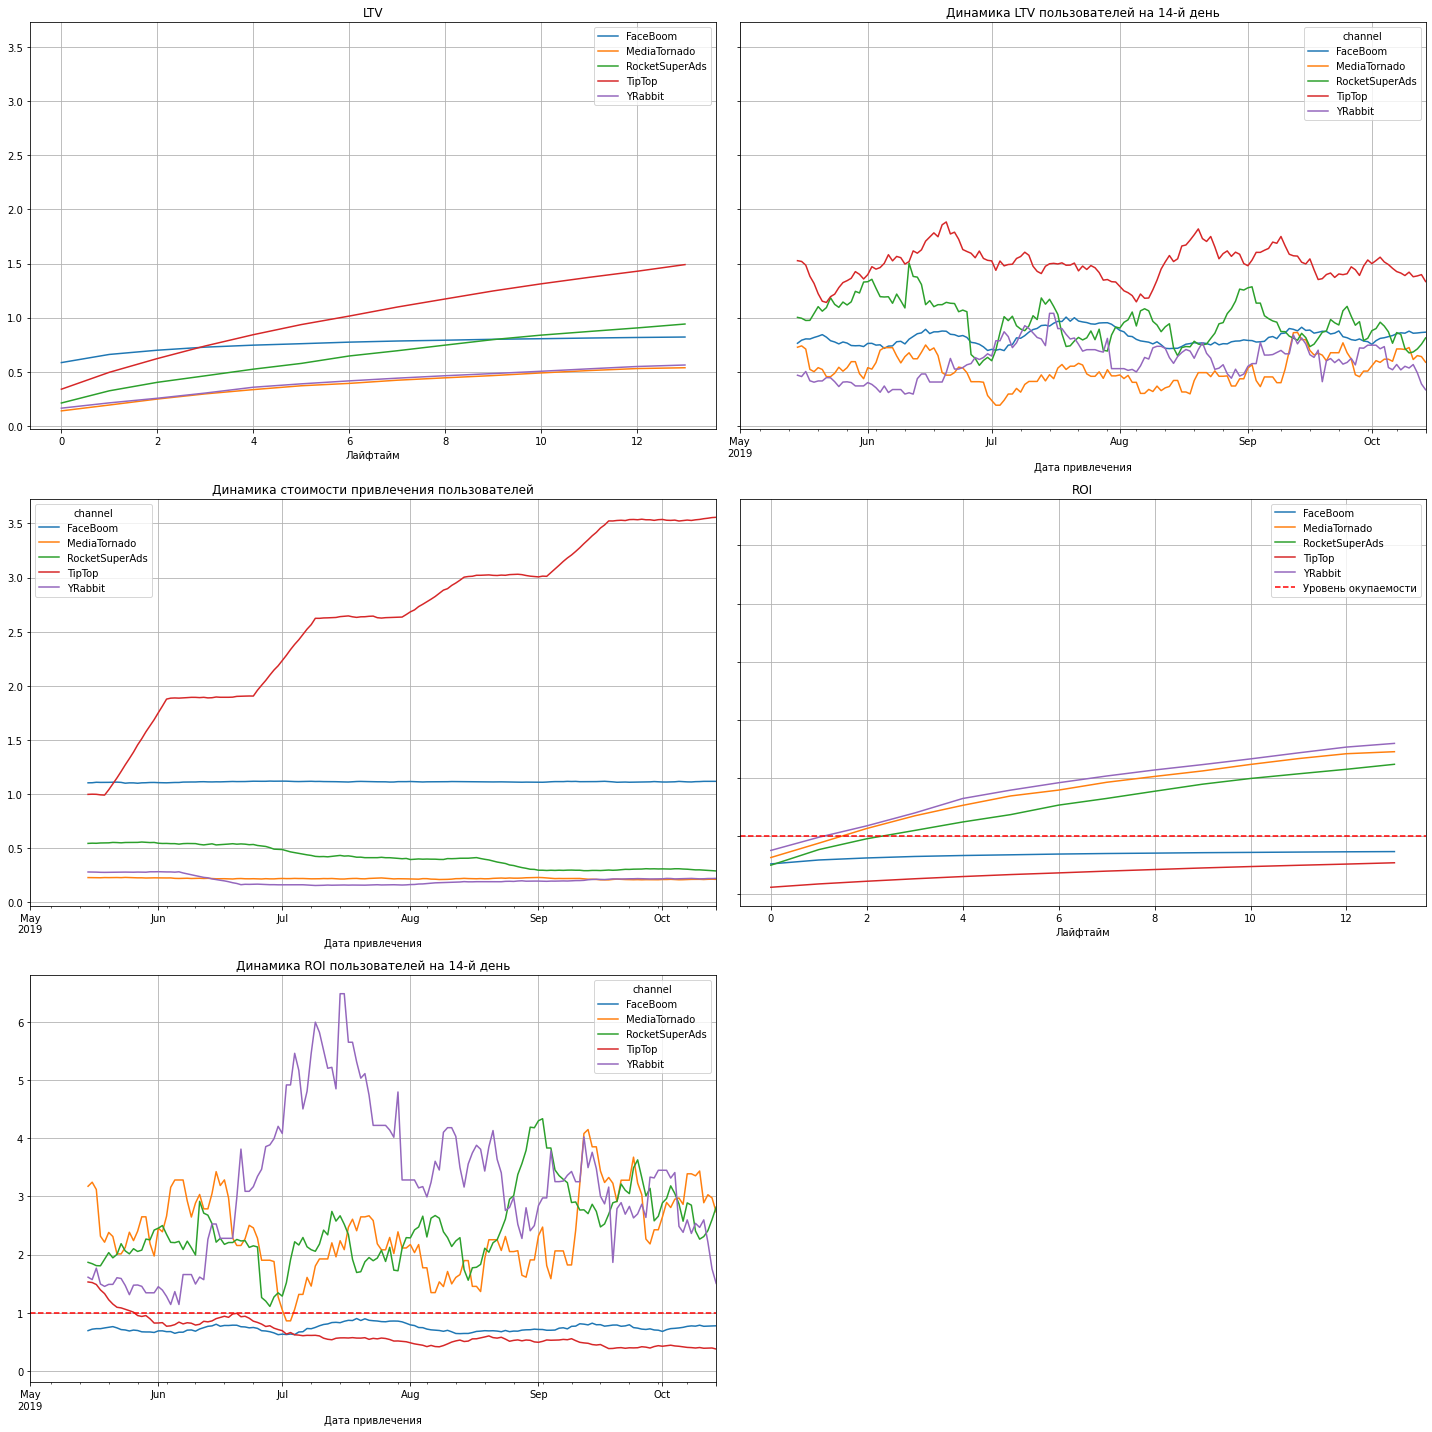

In [71]:
# расчет LTV и ROI с разбивкой по рекламным каналам США
dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel in @usa_channel.index'),
    order,
    observation,
    horizon,
    dimensions=dimensions
)

# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

*Выводы по американскому рынку:*
- CAC по каналу TipTop растет каждый месяц, RocketSuperAds в сентябре снизился. По остальным источникам цена 1 клиента остается неизменной
- FaceBoom и TipTop не окупаются, хотя на эти каналы уходит основная часть рекламного бюджета. Хотя до июня месяца TipTop на графике оказался выше линии окупаемости.
- Остальные каналы привлечения окупаются уже на 2-3 день рекламы
- LTV стабилен

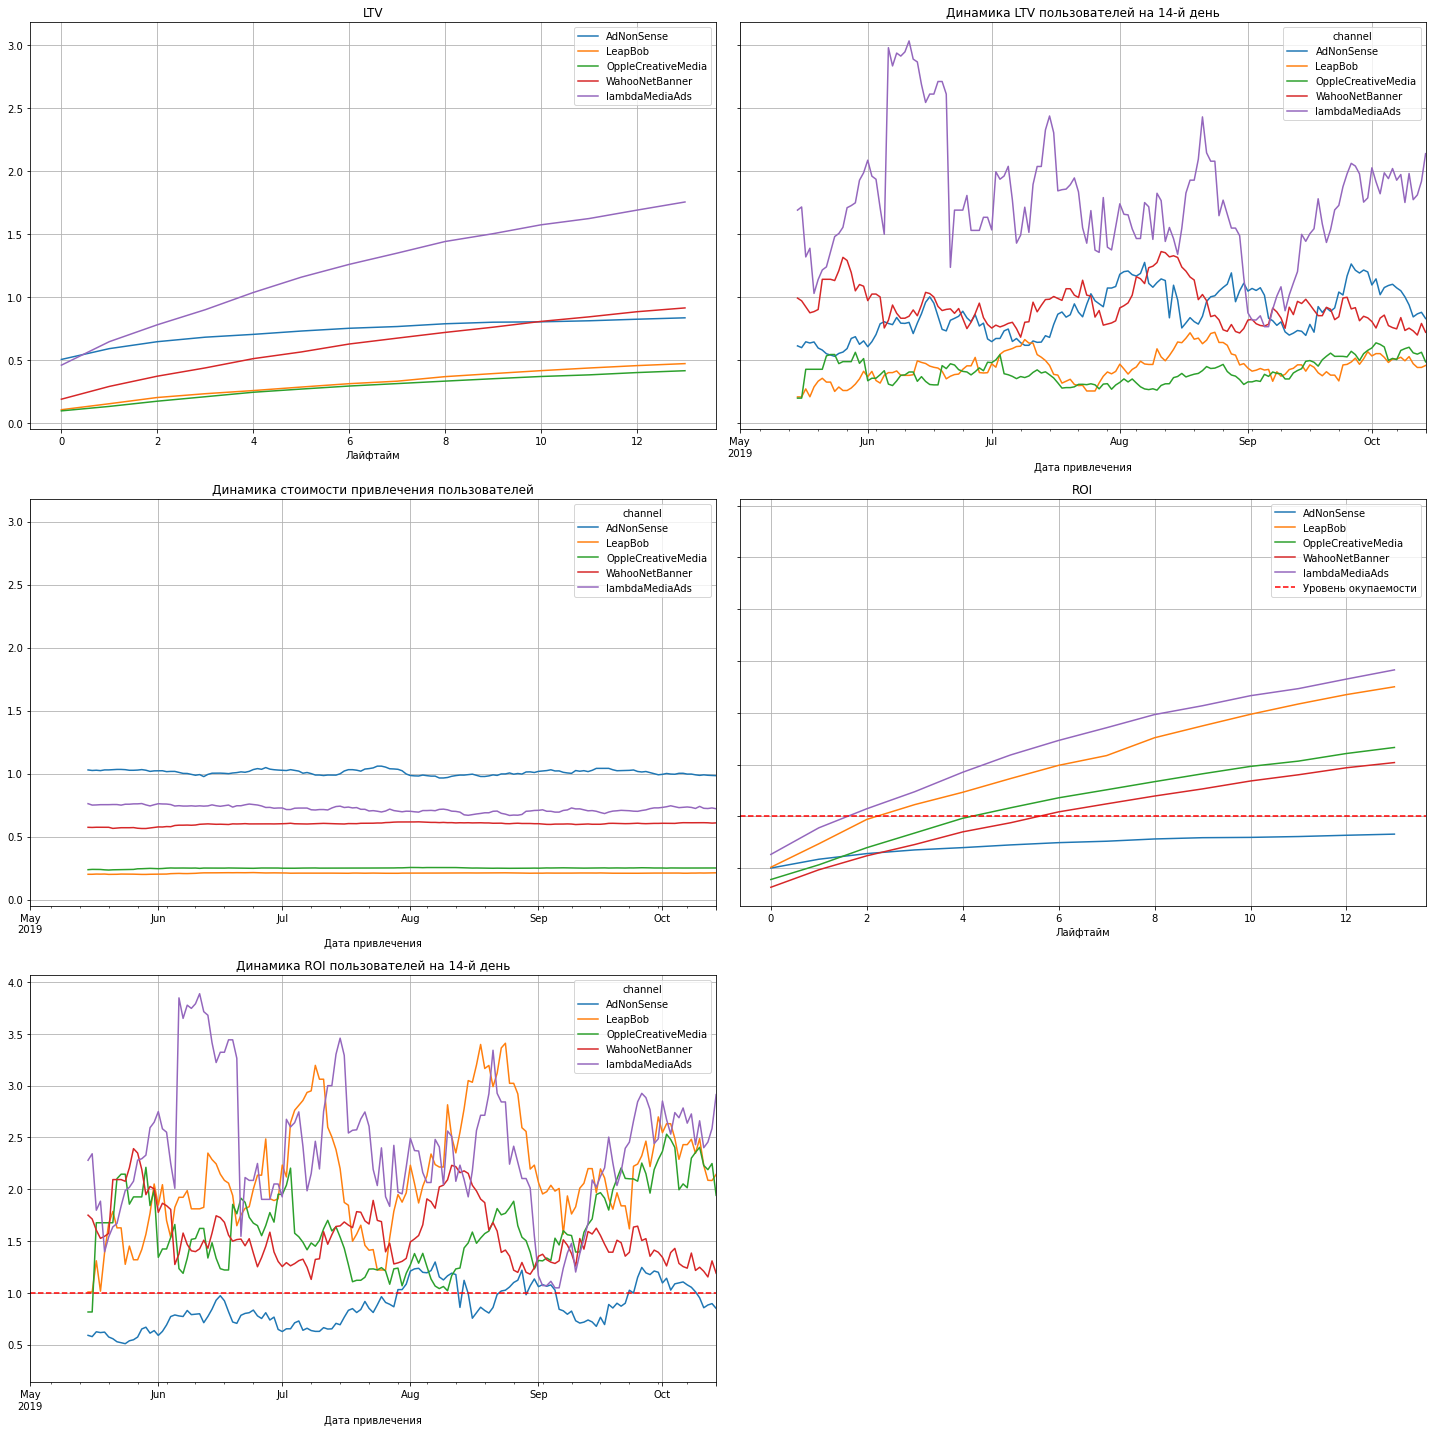

In [72]:
# расчет LTV и ROI с разбивкой по рекламным каналам Европы
dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel in @eu_channel.index'),
    order,
    observation,
    horizon,
    dimensions=dimensions
)

# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

*Выводы по европейскому рынку:*
- CAC по всем каналам остается неизменным и стабильным.
- Не окупается только канал AdNonSense, на него приходится 4% рекламного бюджета. С августа месяца можно заметить, что линия графика стала выше и периодически пересекает линию окупаемости, хотя все еще остается нестабильной и растет скачкообразно. 
- Остальные каналы окупаются на 2-6 день. 
- LTV стабилен

#### Конверсия и удержание пользователей

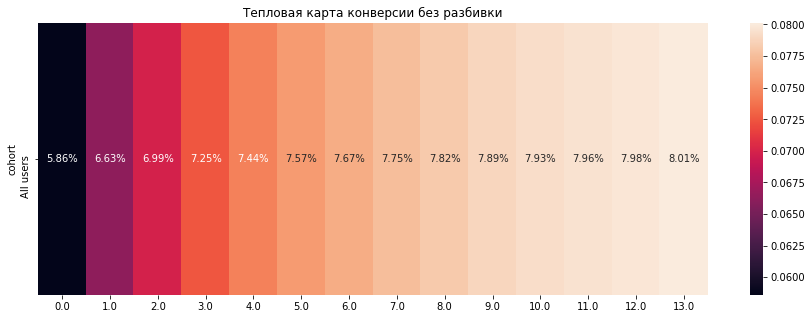

In [73]:
# расчет конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, order, observation, horizon
)

# хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии без разбивки')
plt.show() 

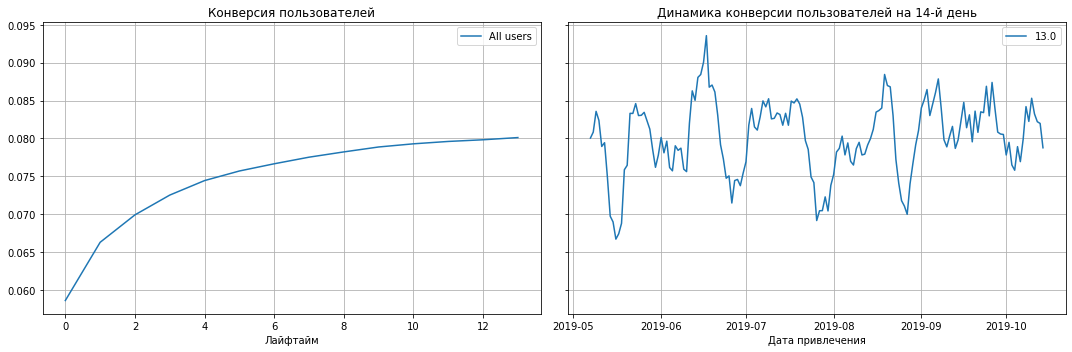

In [74]:
# построение кривых конверсии 
plot_conversion(conversion, conversion_history, horizon, window=7)

*Общая конверсия растёт: от 5,86% в первый день «жизни» пользователей до 8,01% на 14 день.  
Более 5,8% новых пользователей совершают покупки в день первого посещения, а к 14 дню «жизни» доля покупателей достигает 8%. Возможно, проблема в удержании.*

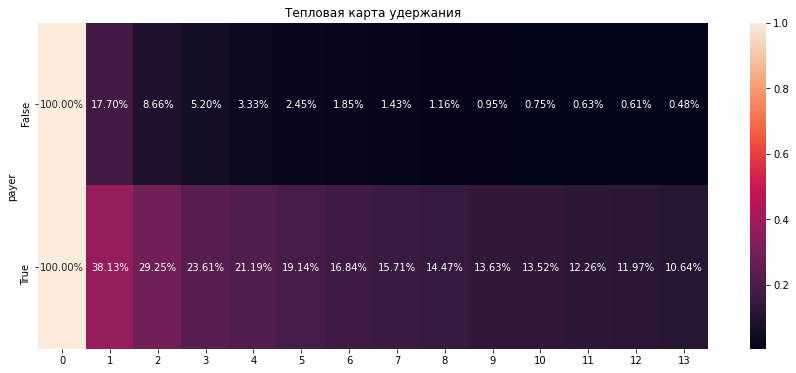

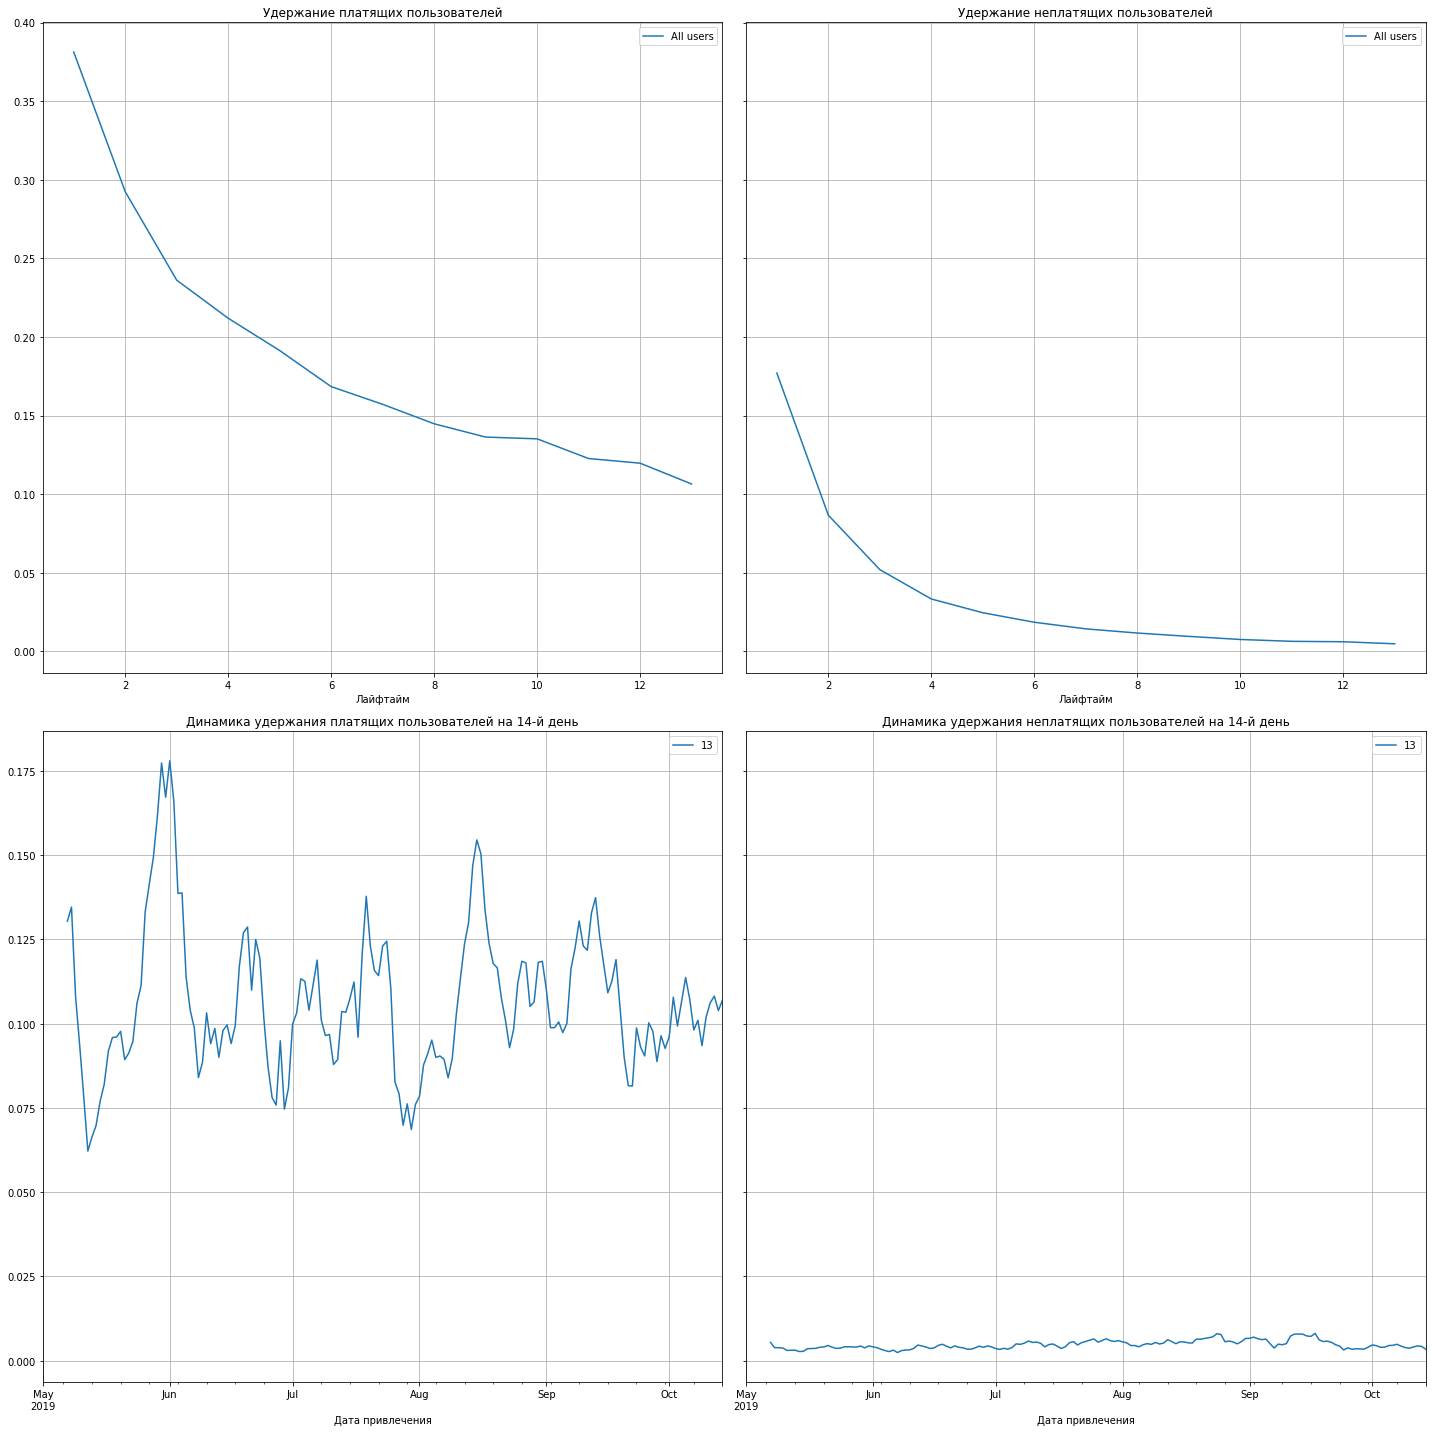

In [75]:
# расчет удержания
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation, 
    horizon
)

# тепловая карта удержания
plt.figure(figsize = (15, 6))  
sns.heatmap(retention.drop(columns = ['cohort_size']), 
            annot = True,  
            fmt = '.2%'  
           )
plt.title('Тепловая карта удержания')
plt.show()

# построение кривых удержания 
plot_retention(retention, retention_history, horizon, window=7)

*Действительно, пользователи стабильно плохо удерживаются. 
По светлым пятнам на графике видно, что лучшее удержание показывают пользователи, которые совершали покупки.   
На следующий день возвращается 38% покупателей. А к концу 2 недели остается лишь около 11%.  
Если пользователи не делали покупок, то уже на второй день возвращается лишь 17.7% клиентов, а к концу 2 недели остается менее 0.5%.*  
  
  
*Кривые повторяют хитмэп. Платящие пользователи удерживаются лучше*

#### Конверсия и удержание пользователей по странам

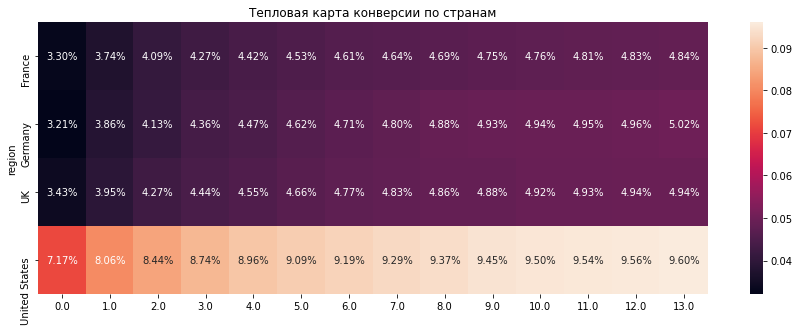

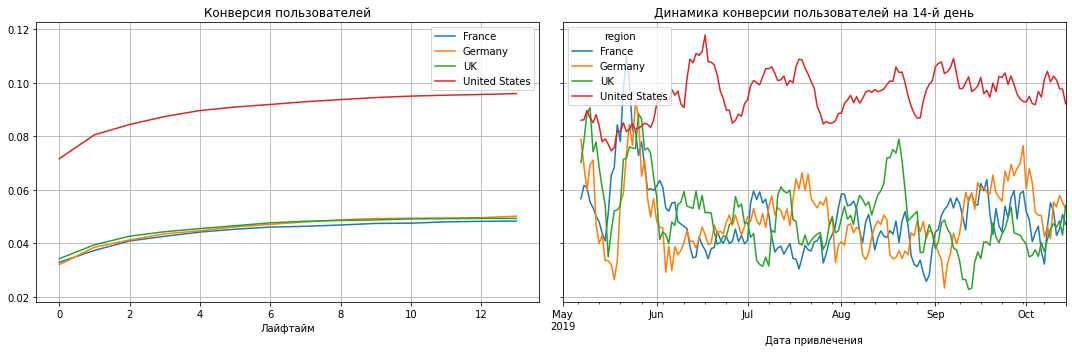

In [76]:
# расчет конверсии с разбивкой по всем странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, order, observation, horizon, dimensions=['region']
)

# хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show()

# построение кривых конверсии по странам
plot_conversion(conversion, conversion_history, horizon, window=7)

*По графику можно сделать такие выводы:  
Выше всего конверсия у посетителей из США: более 7% новых пользователей совершают покупки в день первого посещения, а к 14 дню «жизни» доля покупателей почти достигает более 9.5%.  
Хуже всего конвертируются пользователи из Франции: конверсия первого дня ниже у Германии — около 3,2%.   Однако уже на второй день конверсия немецких пользователей обгоняет французский сегмент. К 14 дню конверсия французских пользователей отстаёт от лидера почти на 0,2%.  
В целом страны Европы имеют одинаковые показатели конверсии, не очень высокого уровня.  
Кривые конверсии подтверждают выводы, сделанные по тепловой карте: линия, соответствующая конверсии американских пользователей, расположена выше немецкой, французской и британской линий. В целом конверсия пользователей из всех стран постепенно растёт на протяжении шести дней, а после 6 дня рост замедляется.*

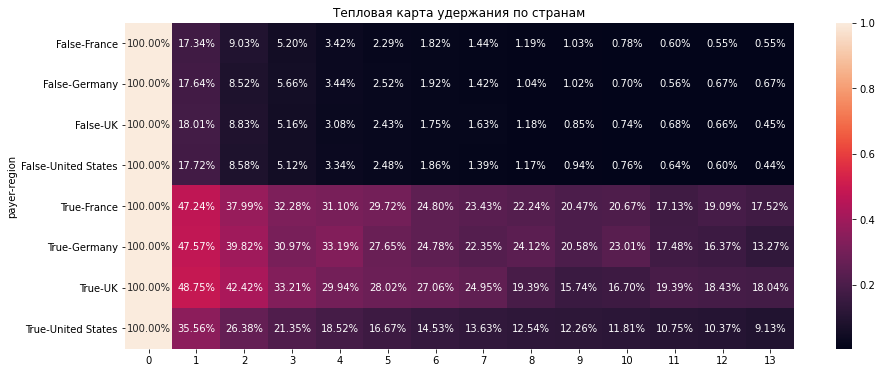

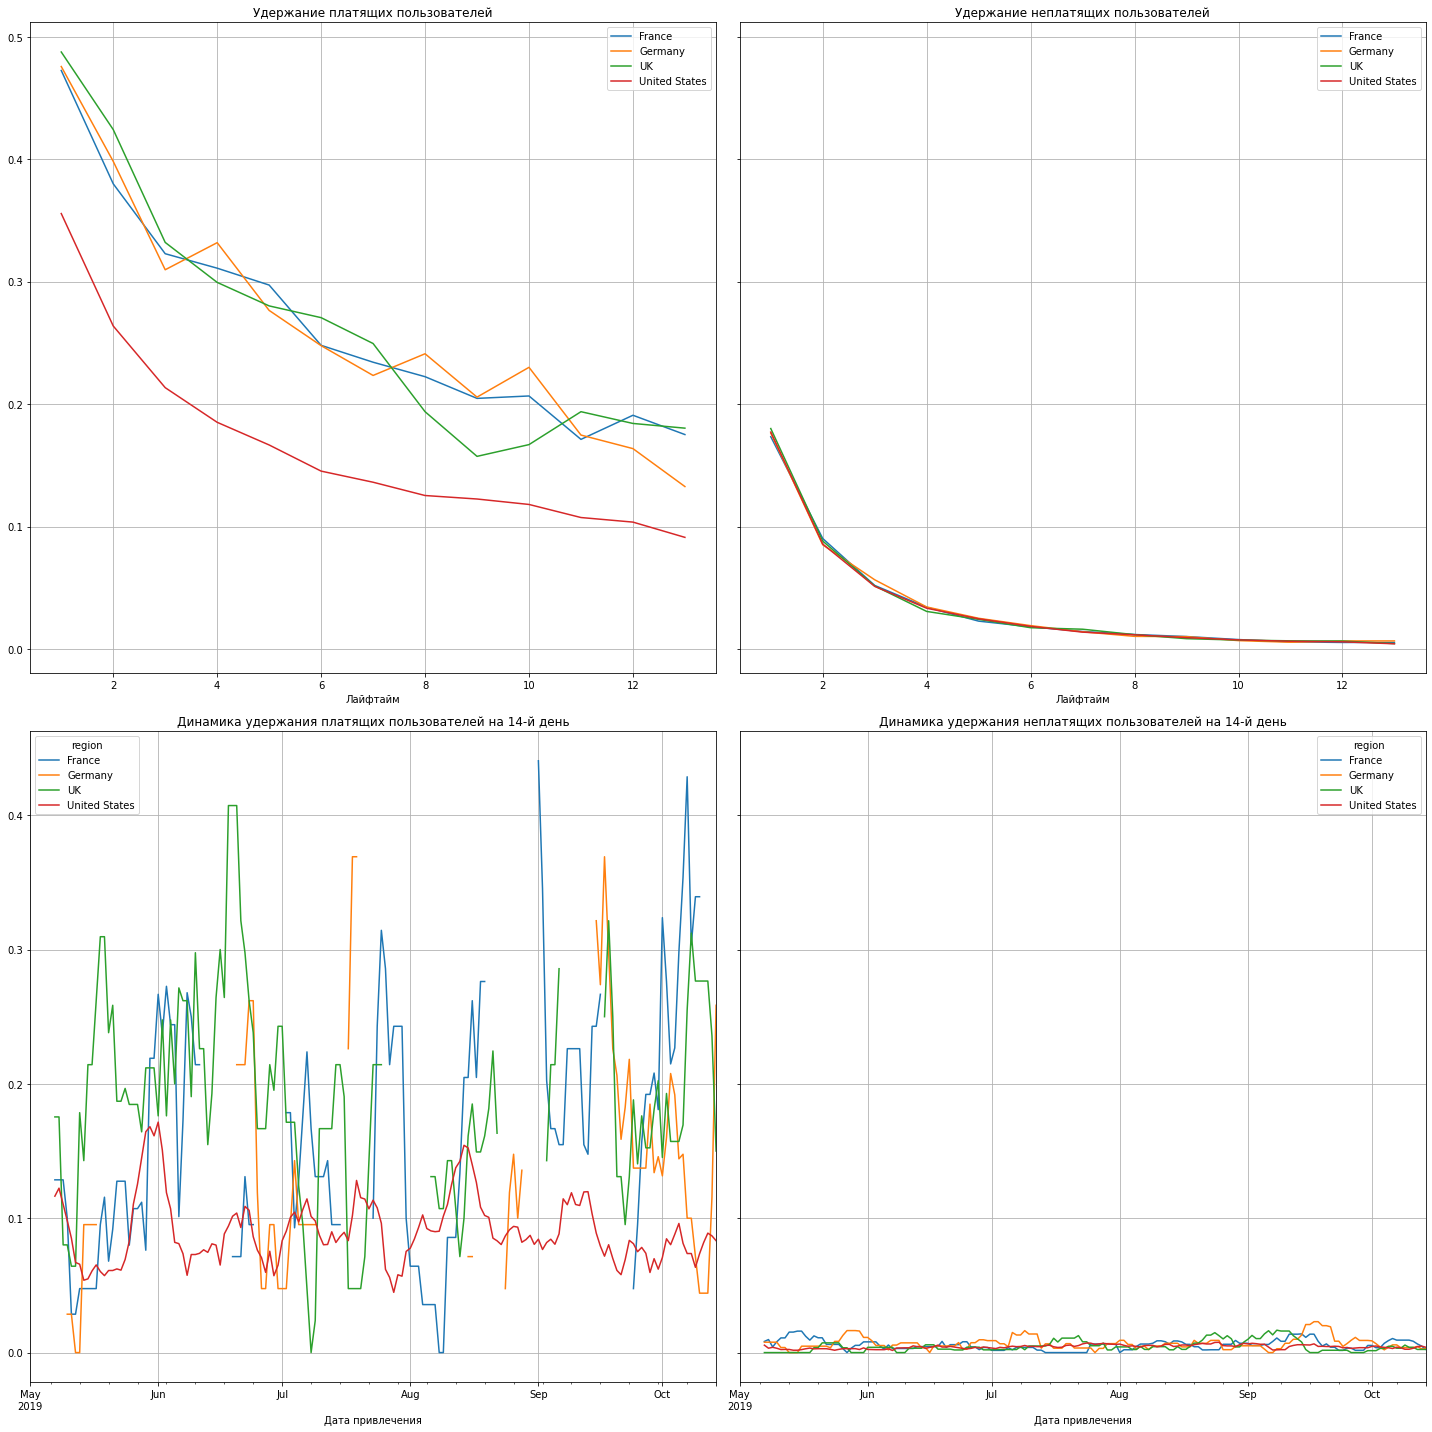

In [77]:
# расчет удержания по странам
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation, 
    horizon,
    dimensions=['region']
)

# тепловая карта удержания
plt.figure(figsize = (15, 6))  
sns.heatmap(retention.drop(columns = ['cohort_size']), 
            annot = True,  
            fmt = '.2%'  
           )
plt.title('Тепловая карта удержания по странам')
plt.show()

# построение кривых удержания 
plot_retention(retention, retention_history, horizon, window=7)

*Действительно, пользователи стабильно плохо удерживаются. Для платящих пользователей из США удержание значительно ниже, чем для других стран. Это очень низкий показатель. Хотя на США идет основная часть рекламного бюджета, а также уровень конверсии в США наибольший.  
Неплатящие пользователи по всем странам имеют одинаково низкий уровень удержания.  
Выше всего удержание у посетителей из Великобритании и Франции: более 18% и 17.5% пользователей возвращаются на 14 день.  
Хуже всего удержание в США - на второй день только 35% пользователей возвращаются, а к концу второй недели - около 9%.*

#### Конверсия и удержание пользователей по устройствам

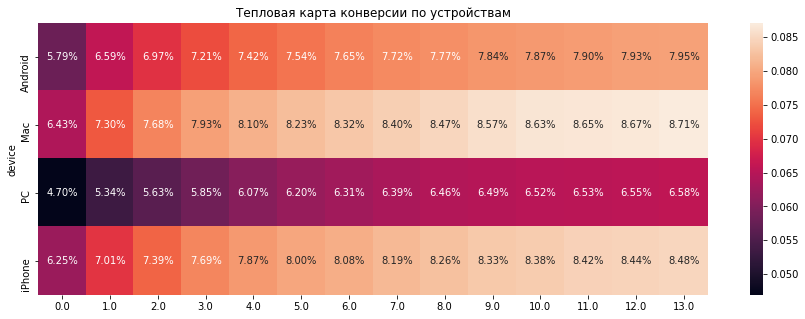

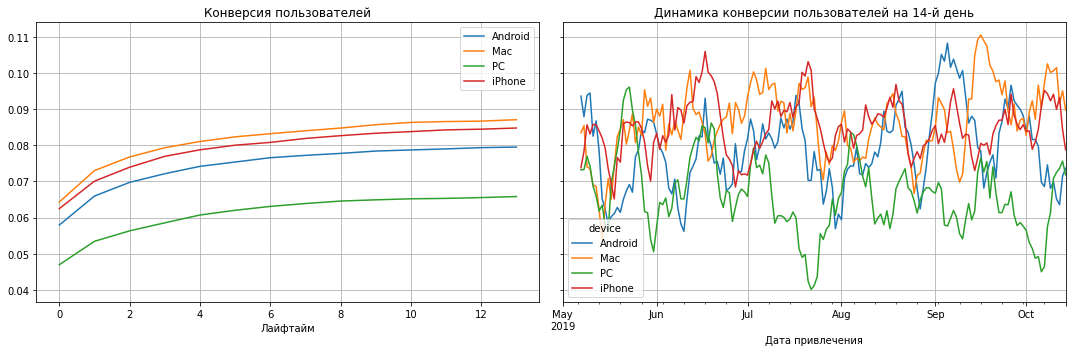

In [78]:
# расчет конверсии с разбивкой по всем устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, order, observation, horizon, dimensions=['device']
)

# хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show()

# построение кривых конверсии по устройствам
plot_conversion(conversion, conversion_history, horizon, window=7)

*По графику можно сделать такие выводы:  
Выше всего конверсия у пользователей Mac и iPhone: более 6.4% и 6.25% новых пользователей совершают покупки в день первого посещения, а к 14 дню «жизни» доля покупателей почти достигает более 8.7% и 7.5%.  
Хуже всего конвертируются пользователи на ПК: конверсия первого дня — около 4,7%. На 14 день конверсия составляет около 6.6%, несмотря на то, что окупаемость рекламы для пользователей PC выше всего. Конверсия пользователей на ПК отстаёт от лидера почти на 2,13%.  
В целом чаще покупки совершают пользователи, использующие устройства ОС iOS.*  

*Кривые конверсии подтверждают выводы, сделанные по тепловой карте: линия, соответствующая конверсии пользователей на MAC, расположена выше остальных линий. В целом конверсия пользователей всех устройств постепенно растёт на протяжении 8 дней, а после 10 дня рост замедляется.*

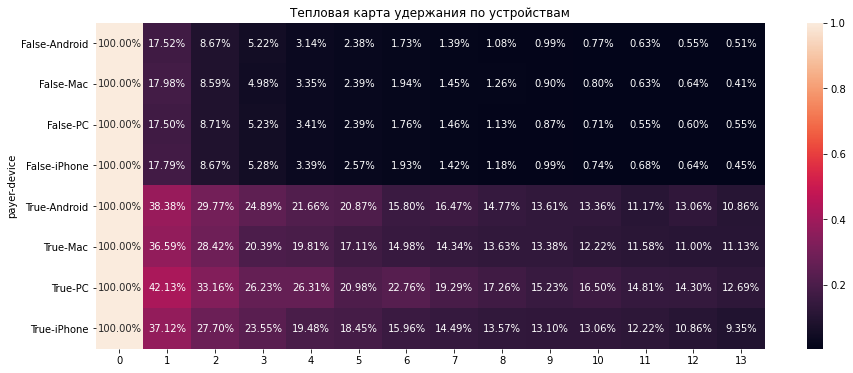

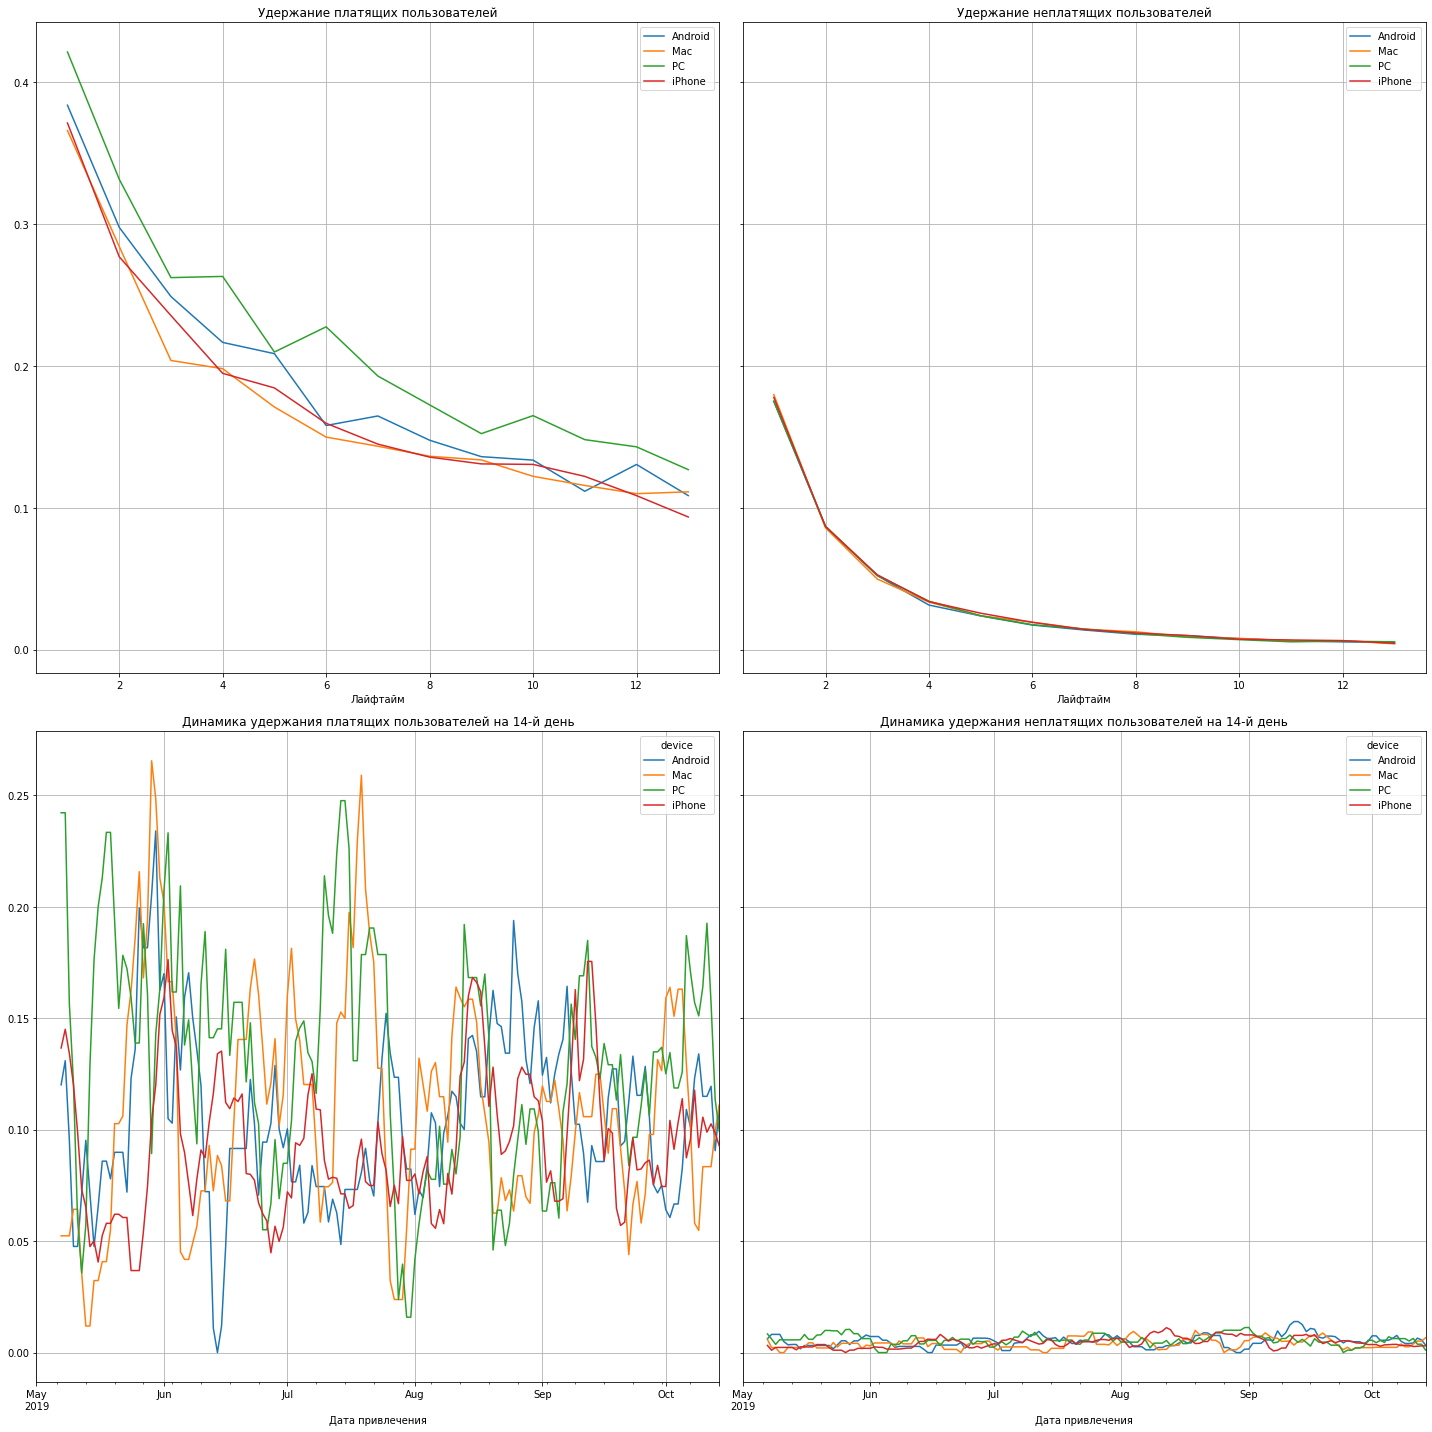

In [79]:
# расчет удержания по устройствам
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation, 
    horizon,
    dimensions=['device']
)

# тепловая карта удержания по устройствам
plt.figure(figsize = (15, 6))  
sns.heatmap(retention.drop(columns = ['cohort_size']), 
            annot = True,  
            fmt = '.2%'  
           )
plt.title('Тепловая карта удержания по устройствам')
plt.show()

# построение кривых удержания по устройствам
plot_retention(retention, retention_history, horizon, window=7)

*Действительно, пользователи стабильно плохо удерживаются. Для платящих пользователей на iPhone удержание оказалось ниже, чем для других устройств, - 9.35%. Лучший показатель удержания дают пользователи ПК - около 12.7%, хотя конверсия у этого устройства страдает.
Неплатящие пользователи по всем устройствам имеют одинаково низкий уровень удержания.*

#### Конверсия и удержание пользователей по каналам

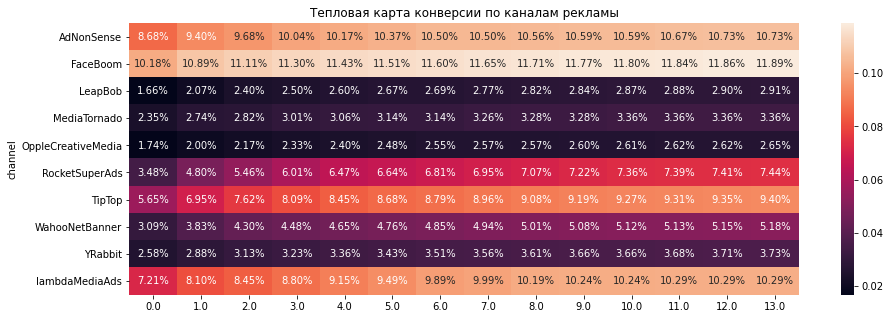

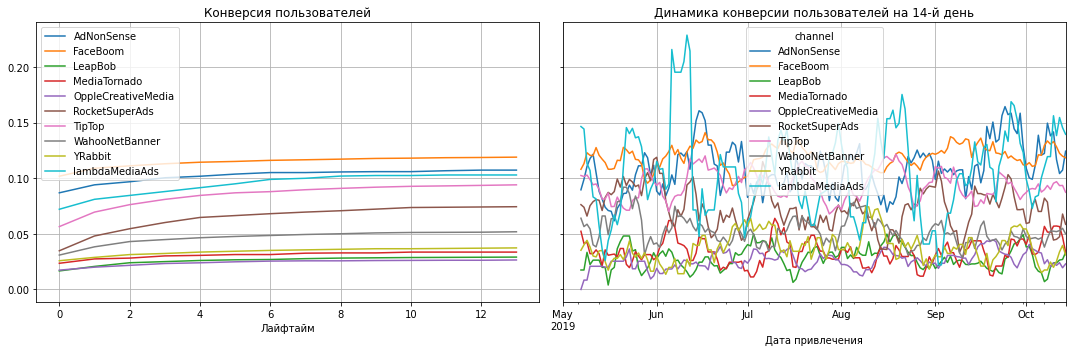

In [80]:
# расчет конверсии с разбивкой по всем каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, order, observation, horizon, dimensions=['channel']
)

# хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по каналам рекламы')
plt.show()

# построение кривых конверсии по каналам
plot_conversion(conversion, conversion_history, horizon, window=7)

*Выше всего конверсия у пользователей, привлеченных из FaceBoom: 10.18% новых пользователей совершают покупки в день первого посещения, а к 14 дню «жизни» доля покупателей почти достигает около 11.9%. Следом идут каналы - AdNonSense, lambdaMediaAds.  
Хуже всего конвертируются пользователи, привлеченные из OppleCreativeMedia и LeapBob - 2.7% и 2.9% соответственно.*

*Кривые конверсии подтверждают выводы, сделанные по тепловой карте: линии, соответствующие конверсии пользователей из FaceBoom, AdNonSense, lambdaMediaAds, расположены выше остальных линий. Судя по графикам, пользователи из всех каналов конвертируются достаточно хорошо.  В целом конверсия пользователей всех устройств постепенно растёт на протяжении 7 дней, а затем рост замедляется.*

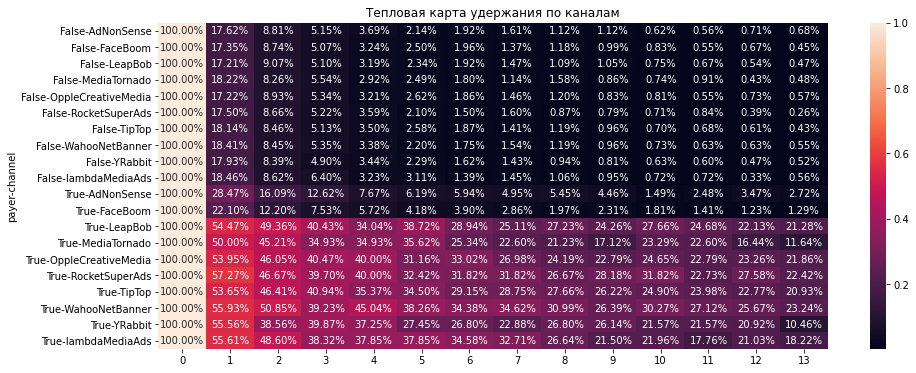

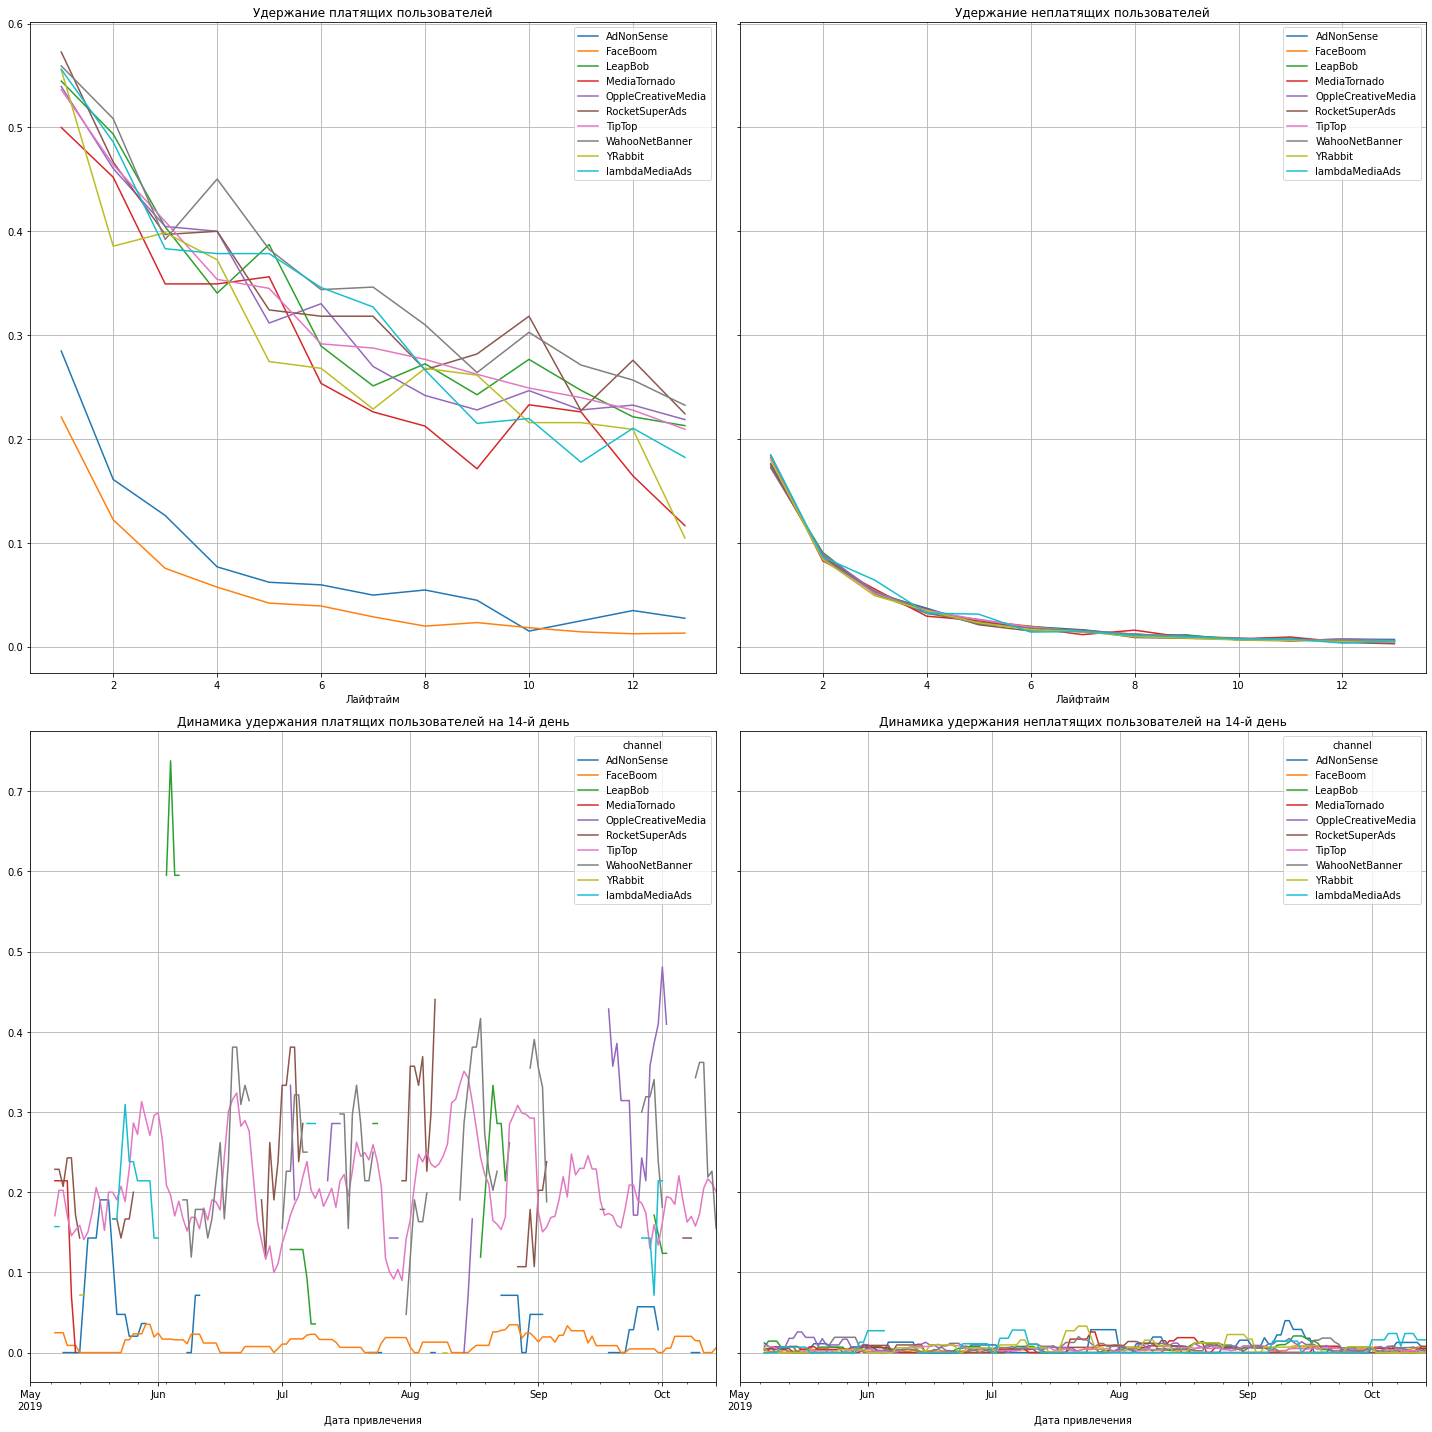

In [81]:
# расчет удержания по каналам
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation, 
    horizon,
    dimensions=['channel']
)

# тепловая карта удержания по каналам
plt.figure(figsize = (15, 6))  
sns.heatmap(retention.drop(columns = ['cohort_size']), 
            annot = True,  
            fmt = '.2%'  
           )
plt.title('Тепловая карта удержания по каналам')
plt.show()

# построение кривых удержания по каналам
plot_retention(retention, retention_history, horizon, window=7)

*Для платящих пользователей хуже всего удерживаются пользователи из FaceBoom(1.2%) и AdNonSense(2.7%), уже на второй день возвращаются менее 30% пользователей. По остальным каналам ситуация лучше - на второй день возвращаются около 50% покупателей, а к концу недели их остается около 20%. Лучший показатель удержания дают покупатели из WahooNetBanner и  RocketSuperAds.*

*Удержание неплатящих пользователей из разных каналов, стран, платформ оказалось одиноко стабильным и ровным, тогда как удержание покупателей различается в зависимости от страны, канала или устройства.* 

*Мы ранее выяснили, что не окупаются инвестиции в такие каналы, как TipTop, FaceBoom, AdNonSense. Рассмотрим их отдельно.*

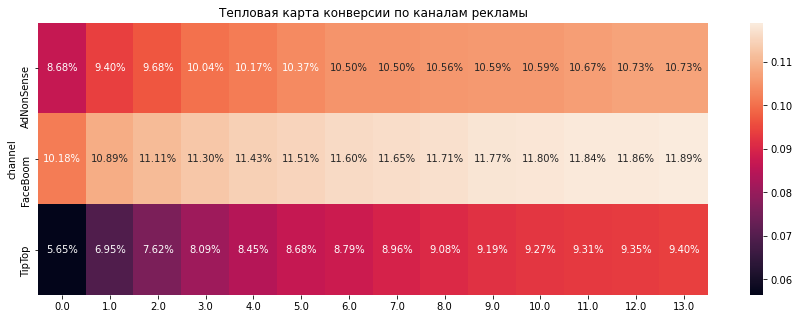

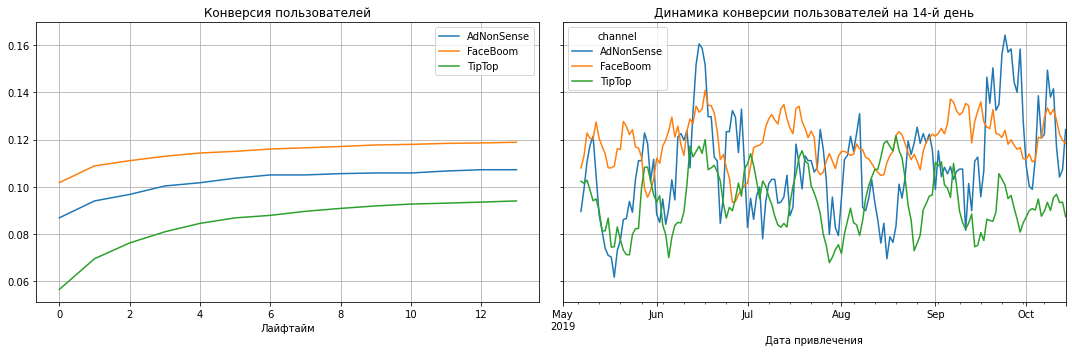

In [82]:
# расчет конверсии по каналам без окупаемости
channel_worst = ['TipTop', 'FaceBoom', 'AdNonSense']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel in @channel_worst'), order, observation, horizon, 
    dimensions=['channel']
)

# хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по каналам рекламы')
plt.show()

# построение кривых конверсии по каналам
plot_conversion(conversion, conversion_history, horizon, window=7)

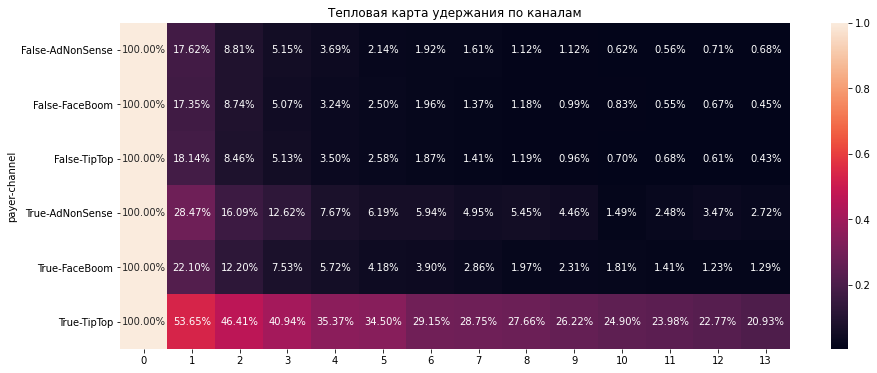

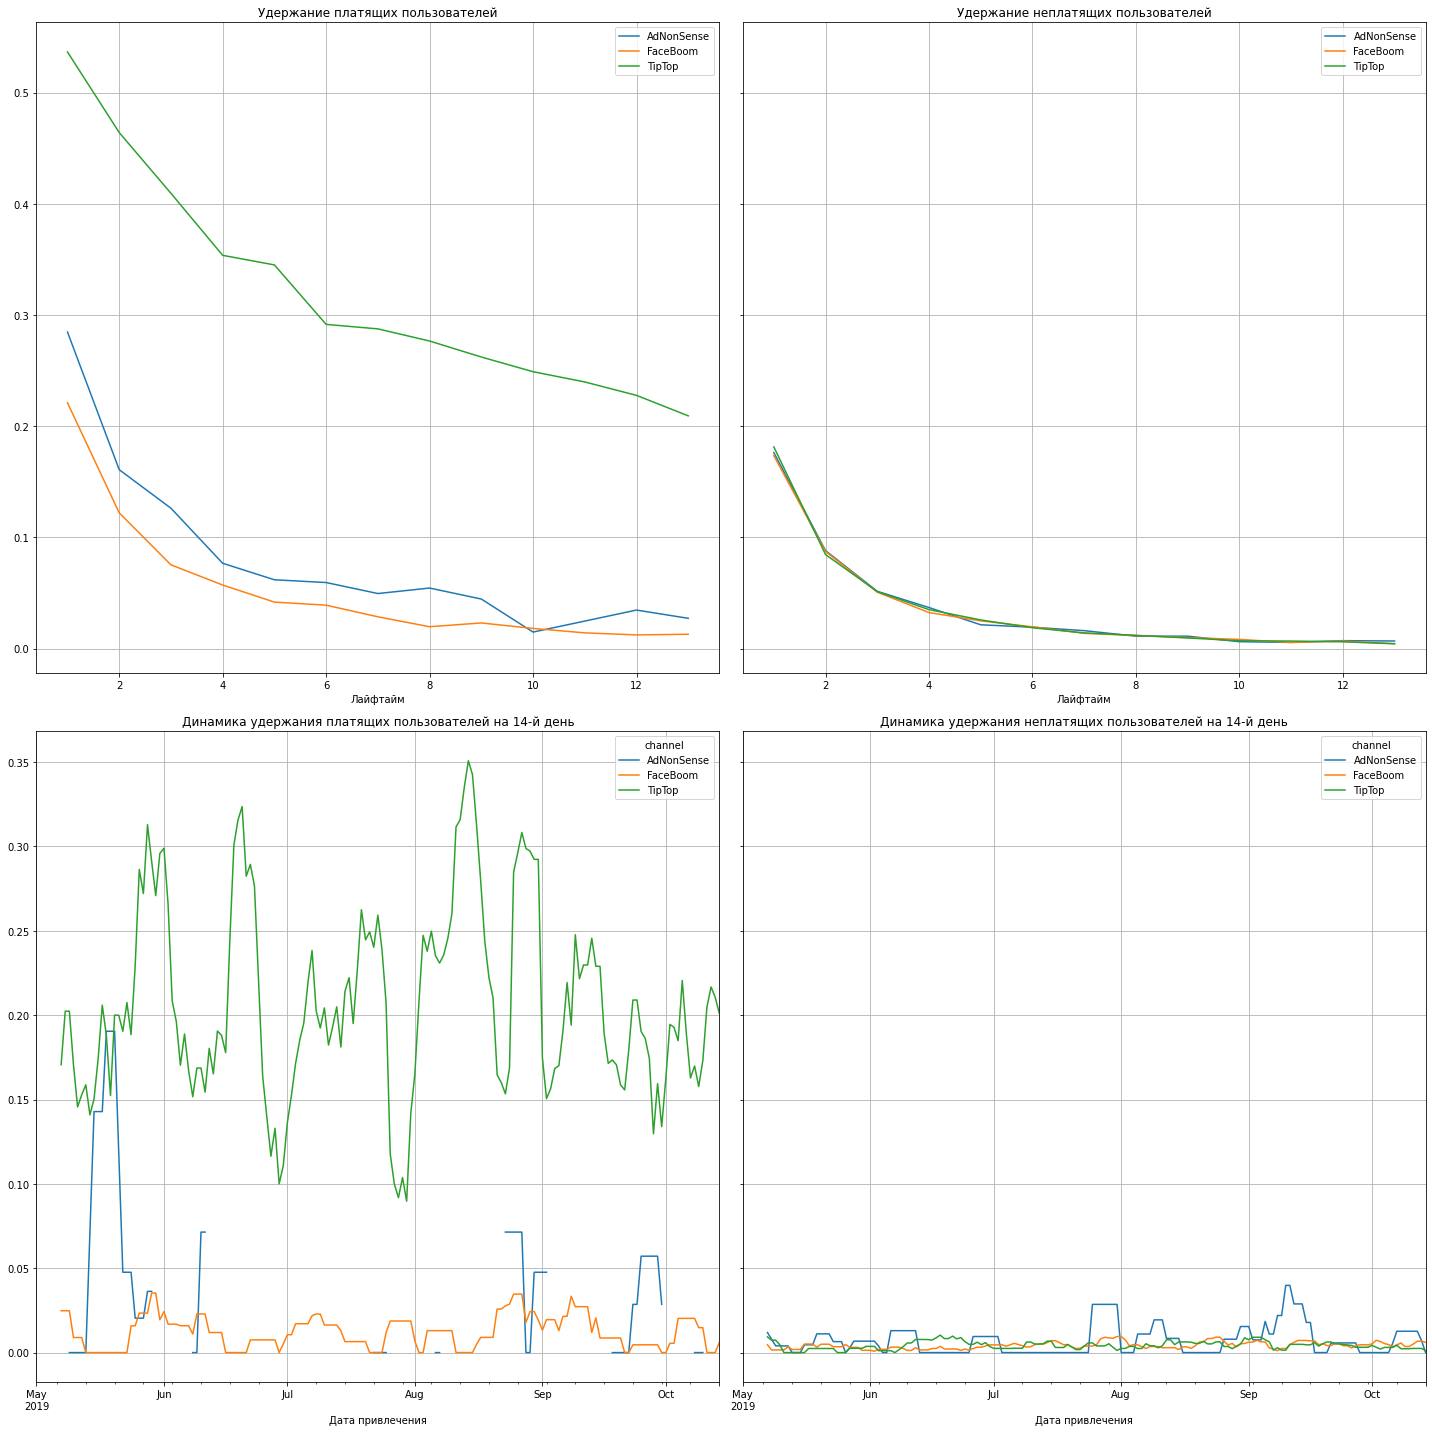

In [83]:
# расчет удержания по каналам без окупаемости
retention_raw, retention, retention_history = get_retention(
    profiles.query('channel in @channel_worst'),
    visits,
    observation, 
    horizon,
    dimensions=['channel']
)

# тепловая карта удержания по каналам без окупаемости
plt.figure(figsize = (15, 6))  
sns.heatmap(retention.drop(columns = ['cohort_size']), 
            annot = True,  
            fmt = '.2%'  
           )
plt.title('Тепловая карта удержания по каналам')
plt.show()

# построение кривых удержания по каналам без окупаемости
plot_retention(retention, retention_history, horizon, window=7)

*Сделаем вывод, что несмотря на высокий уровень конверсии пользователей из FaceBoom и AdNonSense - 1 и 2 место - удержание пользователей из этих каналов имеет самые низкие показатели - последнее и предпоследнее место.  
Возможно, пользователи, которые приходят из этих каналов, не являются целевой аудиторией приложения. 
Если говорить про TipTop, то видно довольно высокое значение удержания и конверсия выше среднего. При этом на этот канал уходит более 50% рекламного бюджета, а окупаемость все равно не наступает и цена 1 привлеченного пользователя растет. Канал является слишком дорогим для компании.*

#### Вывод: 

<div style="border:solid pink 5px; padding: 20px">
<li>В целом реклама компании не окупается.</li>
<li>Негативно на окупаемость сказывается американский рынок. В США пользователи не окупаются, при этом доля американского рынка составляет 66% от всех пользователей.</li>    
<li>Несмотря на самую высокую конверсию пользователей из США, они также показывают самое низкое удержание.</li> 
<li>Окупилась реклама только для пользователей ПК, почти к концу второй недели, но пользователи ПК показали низкий уровень конверсии и неплохой показатель удержания.</li>
<li>В целом чаще покупки совершают пользователи, использующие устройства ОС iOS. Но при этом удержание пользователей с iPhon ниже всех.</li> 
<li>Выделяется три канала, которые негативно влияют на окупаемость рекламы -  FaceBoom, AdNonSense и TipTop.</li>   
<li>FaceBoom потребляет 30% рекламного бюджета и показал самое низкое удержание платящих пользователей - менее 1.5% к концу 2 недели. AdNonSense также занимает около 4% бюджета и дает низкий уровень удержания. Несмотря на высокую конверсию этих источников, вероятно из этих каналов идет нецелевая аудитория.</li>
<li>TipTop потребляет более половины рекламного бюджета и дает достаточно хорошие показатели конверсии и удержания, но стоимость 1 привлеченного клиента неизменно растет. Этот канал является слишком дорогим для привлечения пользователей.</li>
</div> 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<p></p>

<div style="border:solid pink 5px; padding: 20px">
    Итак, нами был получены и изучены данные о посещениях приложения за 2019г., об объеме покупок, совершенных пользователями, и о размере расходов на рекламу для привлечения пользователей.<br>
    Прежде чем дать ответ на поставленные перед нами вопросы, был проведен ряд манипуляций с данными.<br>  
    Названия колонок были приведены к единому стилю, данные приведены к корректному типу, строки были проверены на наличие пропусков и дубликатов.<br>   
    Был анализирован период с 01/05/2019-27/10/2019.<br>
    <br>
    <li>Основная аудитория приложения - пользователи из США, их число выше, чем в странах Европы вместе взятых. При этом стоимость привлечения одного пользователя из США компании обходится дороже, чем в странах Европы.</li>
    <li>Чаще всего в приложение заходят с iPhon или Android, то есть с мобильных устройств. А пользователи, использующие Mac и iPhone, чаще остальных конвертируются в платящих.</li>
    <li>В целом реклама компании не окупается.</li>
    <li>Негативно на окупаемость сказывается американский рынок. В США пользователи не окупаются, при этом доля американского рынка составляет 66% от всех пользователей. Несмотря на самую высокую конверсию пользователей из США, они также показывают самое низкое удержание.</li>
    <li>Реклама в США окупается в 3 каналах из пяти, в Европе - в 4 из пяти. Источники привлечения, которые не окупаются - TipTop, FaceBoom и AdNonSense.</li>
    <li>На площадку TipTop уходит более половины рекламного бюджета приложения, при высоком удержании конверсия средняя и окупаемость очень низкая, а также стоимость 1 привлеченного клиента неизменно растет. Этот канал является слишком дорогим для привлечения пользователей.</li>
    <li>Второй не окупающийся канал рекламы - FaceBoom, также канал из США. FaceBoom потребляет 30% рекламного бюджета и показал самое низкое удержание платящих пользователей. Аналогичная ситуация с площадкой AdNonSense в Европе. Скорее всего, с этих каналов приходит не целевая аудитория.</li>
    <br>
    <b><span style="color:#c71585">Рекомендации:</span></b>
    <li>Компании следует перераспределить расходы на рекламу между другими каналами.</li> 
    <li>Так как основная аудитория - клиенты из США, то следует проработать финансирование рекламных площадок этого рынка: отказаться от FaceBoom и TipTop, отдав предпочтение RocketSuperAds. Этот канал окупается, имеет высокий показатель конверсиии - 7.44%, и высокий показатель удержания - 22.4%.</li>
    <li>Необходимо развивать привлечение пользователей на европейском рынке. Снизить инфестиции в AdNonSense, увеличив расходы на рекламу в lambdaMediaAds, канал окупается, конверсия и удержание на высоком уровне - 10.29% и 18.2% соответственно.</li>

</div>